In [ ]:
%cd /content/drive/MyDrive/tactful
!git clone https://github.com/iitb-research-code/trust.git

/content/drive/MyDrive/tactful
Cloning into 'trust'...
remote: Enumerating objects: 436, done.
remote: Counting objects: 100% (122/122), done.
remote: Compressing objects: 100% (51/51), done.
remote: Total 436 (delta 100), reused 71 (delta 71), pack-reused 314
Receiving objects: 100% (436/436), 1.03 GiB | 14.58 MiB/s, done.
Resolving deltas: 100% (187/187), done.


#Data Preparations

In [ ]:
!pip install sahi

In [2]:
import json

# Open the JSON file
with open('/content/drive/MyDrive/tactful/docvqa.json', 'r') as f:
    data = json.load(f)

# Now 'data' contains the data from the JSON file
print(data)


[{'file_name': '1056_bspl_2_2020_02_19_16_21_01_fp.png', 'annotations': [{'original_width': 612, 'original_height': 966, 'image_rotation': 0, 'value': {'x': 56.34779510513197, 'y': 27.655434156997128, 'width': 23.32104097123085, 'height': 2.2730493827668887, 'rotation': 0, 'rectanglelabels': ['Date Block']}, 'id': '6lopwDzG1I', 'from_name': 'rect-label', 'to_name': 'image', 'type': 'rectanglelabels', 'origin': 'manual'}, {'original_width': 612, 'original_height': 966, 'image_rotation': 0, 'value': {'x': 16.881418076895123, 'y': 5.682623456917218, 'width': 73.55097537080502, 'height': 10.35500274371582, 'rotation': 0, 'rectanglelabels': ['Subject Block']}, 'id': 'ALI54-RpcJ', 'from_name': 'rect-label', 'to_name': 'image', 'type': 'rectanglelabels', 'origin': 'manual'}, {'original_width': 612, 'original_height': 966, 'image_rotation': 0, 'value': {'x': 9.168956279287347, 'y': 82.06816598039454, 'width': 28.104844247380772, 'height': 3.2832935528855103, 'rotation': 0, 'rectanglelabels': [

In [ ]:
MAPPING ={"0":"Date Block" ,"1":"Subject Block" ,"2":"Adressed To" ,"3":"Table" ,"4":"Stamps/Seals" ,"5":"Logos" ,"6":"Signature" ,"7":"Header Block","8":"Signature Block","9":"Copy-Forwarded To Block" ,"10":"Body Block","11":"Handwritten Text" ,"12":"Circular Reference", }

In [ ]:
img_name=data[0]['file_name']
annotations=data[0]['annotations']
img_name

'1056_bspl_2_2020_02_19_16_21_01_fp.png'

In [ ]:
labels=set()
q_labels=set()
files=[]
for da in data:
    img_name=da['file_name']
    annotations=da['annotations']
    width=0
    height=0
    files.append(img_name)
    for annotation in annotations:
        if annotation['type']=='rectanglelabels':
            if width==0:
                width=annotation['original_width']
                height=annotation['original_height']
                print('>>>',[img_name,width,height])
            x,y,w,h=annotation['value']['x'],annotation['value']['y'],annotation['value']['width'],annotation['value']['height']
            label=annotation['value']['rectanglelabels'][0]
            if label in ['Adressed To','Circular Reference','Reference Id']:
                continue
            labels.add(label)
            print([label,[x,y,w,h]])
        elif annotation['type']=='textarea':
            value=annotation['value']['text'][0]
            q_label=annotation['to_name']
            q_labels.add(q_label)

In [ ]:
labels

{'Address of Issuing Authority',
 'Addressed To Block',
 'Body Block',
 'Circular ID',
 'Copy-Forwarded To Block',
 'Date Block',
 'Handwritten Text',
 'Header Block',
 'Logos',
 'Reference Block',
 'Signature',
 'Signature Block',
 'Stamps/Seals',
 'Subject Block',
 'Table'}

In [ ]:
from sahi.utils.coco import Coco, CocoCategory, CocoImage, CocoAnnotation
from sahi.utils.file import save_json
from PIL import Image

input the all the classes

In [ ]:
coco = Coco()
map = {'Date Block': 0, 'Logos': 1, 'Subject Block': 2, 'Body Block': 3, 'Circular ID': 4, 'Table': 5, 'Stamps/Seals': 6, 'Handwritten Text': 7, 'Copy-Forwarded To Block': 8, 'Address of Issuing Authority': 9, 'Signature': 10, 'Reference Block': 11, 'Signature Block': 12, 'Header Block': 13, 'Addressed To Block': 14}
for k,v in map.items():
  coco.add_category(CocoCategory(id=v, name=k, supercategory='first'))
# coco.add_category(CocoCategory(id=1, name='vehicle'))

input annotations

In [ ]:
labels=set()
q_labels=set()
files=[]


# d2 = {'Signature': 'Signature', 'Copy-Forwarded To Block': 'Copy-Forwarded To Block', 'Stamps/Seals': 'Stamps/Seals', 'Reference Block': 'Reference Block', 'Circular ID': 'Circular ID', 'Date Block': 'Date Block', 'Header Block': 'Header Block', 'Handwritten Text': 'Handwritten Text', 'Addressed To Block': 'Addressed To Block', 'Logos': 'Logos', 'Signature Block': 'Signature Block', 'Address of Issuing Authority': 'Address of Issuing Authority', 'Subject Block': 'Subject Block', 'Table': 'Table', 'Body Block': 'Body Block'}


for da in data:
    img_name=da['file_name']
    annotations=da['annotations']
    width=0
    height=0
    files.append(img_name)
    for annotation in annotations:
        if annotation['type']=='rectanglelabels':
            if width==0:
                width=annotation['original_width']
                height=annotation['original_height']
                coco_image = CocoImage(file_name=img_name, height=int(height), width=int(width))
                # print('>>>',[img_name,width,height])
            x,y,w,h=annotation['value']['x'],annotation['value']['y'],annotation['value']['width'],annotation['value']['height']
            label=annotation['value']['rectanglelabels'][0]
            if label in ['Adressed To','Circular Reference','Reference Id']:
                continue
            labels.add(label)
            # print([label,[x,y,w,h]])
            coco_image.add_annotation(CocoAnnotation(bbox=[int(x),int(y),int(w),int(h)], category_id=map[label], category_name=label))
        elif annotation['type']=='textarea':
            value=annotation['value']['text'][0]
            q_label=annotation['to_name']
            q_labels.add(q_label)
    coco.add_image(coco_image)

save_json(data=coco.json, save_path='/content/drive/MyDrive/tactful/docvqa_coco.json')

In [ ]:
d1={}
for j,i in enumerate(list(labels)):
    d1[i]=j
print(d1)
# {'Signature': 0, 'Copy-Forwarded To Block': 1, 'Circular Reference': 2, 'Stamps/Seals': 3, 'Reference Block': 4, 'Circular ID': 5, 'Reference Id': 6, 'Date Block': 7, 'Header Block': 8, 'Handwritten Text': 9, 'Addressed To Block': 10, 'Adressed To': 11, 'Logos': 12, 'Signature Block': 13, 'Address of Issuing Authority': 14, 'Subject Block': 15, 'Table': 16, 'Body Block': 17}
# {'Signature': 'Signature', 'Copy-Forwarded To Block': 'Copy-Forwarded To Block', 'Circular Reference': 'Circular Reference', 'Stamps/Seals': 'Stamps/Seals', 'Reference Block': 'Reference Block', 'Circular ID': 'Circular ID', 'Reference Id': 'Reference Id', 'Date Block': 'Date Block', 'Header Block': 'Header Block', 'Handwritten Text': 'Handwritten Text', 'Addressed To Block': 'Addressed To Block', 'Adressed To': 'Adressed To', 'Logos': 'Logos', 'Signature Block': 'Signature Block', 'Address of Issuing Authority': 'Address of Issuing Authority', 'Subject Block': 'Subject Block', 'Table': 'Table', 'Body Block': 'Body Block'}

{'Date Block': 0, 'Logos': 1, 'Subject Block': 2, 'Body Block': 3, 'Circular ID': 4, 'Table': 5, 'Stamps/Seals': 6, 'Handwritten Text': 7, 'Copy-Forwarded To Block': 8, 'Address of Issuing Authority': 9, 'Signature': 10, 'Reference Block': 11, 'Signature Block': 12, 'Header Block': 13, 'Addressed To Block': 14}


In [ ]:
d2={}
for k,v in d1.items():
  d2[str(v)]=k

print(d2)

{'0': 'Date Block', '1': 'Logos', '2': 'Subject Block', '3': 'Body Block', '4': 'Circular ID', '5': 'Table', '6': 'Stamps/Seals', '7': 'Handwritten Text', '8': 'Copy-Forwarded To Block', '9': 'Address of Issuing Authority', '10': 'Signature', '11': 'Reference Block', '12': 'Signature Block', '13': 'Header Block', '14': 'Addressed To Block'}


In [ ]:
with open('/content/drive/MyDrive/tactful/docvqa_coco.json', 'r') as f:
    coco = json.load(f)

In [ ]:
coco.keys()

dict_keys(['images', 'annotations', 'categories'])

In [ ]:
coco['categories']

In [ ]:
coco['annotations']

# Prepare the data in train, lake , test and val

In [4]:
!pip install sahi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.8/61.8 MB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.3/88.3 kB 12.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fire: filename=fire-0.5.0-py2.py3-none-any.whl size=116934 sha256=0340be86aa4b02ab8490c2619175b7aab205ac1fe39fa5a3755bc5e425c43b32
  Stored in directory: /root/.cache/pip/wheels/90/d4/f7/9404e5db0116bd4d43e5666eaa3e70ab53723e1e3ea40c9a95
Successfully built fire
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.8.0.76
    Uninstalling opencv-python-4.8.0.76:
      Successfully uninstalled opencv-python-4.8.0.76


In [5]:
import json

# Open the JSON file
with open('/content/drive/MyDrive/tactful/docvqa.json', 'r') as f:
    data = json.load(f)

In [6]:
from sahi.utils.coco import Coco, CocoCategory, CocoImage, CocoAnnotation
from sahi.utils.file import save_json
from PIL import Image
import random
import cv2
import os

In [7]:
train_coco = Coco()
lake_coco = Coco()
test_coco = Coco()
val_coco = Coco()
map = {'Date Block': 0, 'Logos': 1, 'Subject Block': 2, 'Body Block': 3, 'Circular ID': 4, 'Table': 5, 'Stamps/Seals': 6, 'Handwritten Text': 7, 'Copy-Forwarded To Block': 8, 'Address of Issuing Authority': 9, 'Signature': 10, 'Reference Block': 11, 'Signature Block': 12, 'Header Block': 13, 'Addressed To Block': 14}
for k,v in map.items():
  train_coco.add_category(CocoCategory(id=v, name=k, supercategory='first'))
  lake_coco.add_category(CocoCategory(id=v, name=k, supercategory='first'))
  test_coco.add_category(CocoCategory(id=v, name=k, supercategory='first'))
  val_coco.add_category(CocoCategory(id=v, name=k, supercategory='first'))
# coco.add_category(CocoCategory(id=1, name='vehicle'))

In [8]:
labels=set()
q_labels=set()
files=[]
tr=0
te=0
va=0
la=0
img_dir='/content/drive/MyDrive/tactful/SplitCircularsv2/first_page'

for folder in ['lake','train','test','val']:
  if not os.path.exists(os.path.join('/content/drive/MyDrive/tactful/docvqa',folder)):
    os.mkdir(os.path.join('/content/drive/MyDrive/tactful/docvqa',folder))

for da in data:
    img_name=da['file_name']
    img_path=os.path.join(img_dir,img_name)
    img=cv2.imread(img_path)
    annotations=da['annotations']
    width=0
    height=0
    files.append(img_name)
    for annotation in annotations:
        if annotation['type']=='rectanglelabels':
            if width==0:
                width=annotation['original_width']
                height=annotation['original_height']
                coco_image = CocoImage(file_name=img_name, height=int(height), width=int(width))
                # print('>>>',[img_name,width,height])
            x,y,w,h=annotation['value']['x']/100*width,annotation['value']['y']/100*height,annotation['value']['width']/100*width,annotation['value']['height']/100*height
            label=annotation['value']['rectanglelabels'][0]
            if label in ['Adressed To','Circular Reference','Reference Id']:
                continue
            labels.add(label)
            # print([label,[x,y,w,h]])
            to_be_added_anot=CocoAnnotation(bbox=[int(x),int(y),int(w),int(h)], category_id=map[label], category_name=label)
            if len(to_be_added_anot.bbox)==4:
                # print(to_be_added_anot.bbox)
                coco_image.add_annotation(to_be_added_anot)
        elif annotation['type']=='textarea':
            value=annotation['value']['text'][0]
            q_label=annotation['to_name']
            q_labels.add(q_label)

    split = random.randint(0, 3)
    if tr<=41 and split==0:
        train_coco.add_image(coco_image)
        cv2.imwrite(os.path.join('/content/drive/MyDrive/tactful/docvqa/train',img_name),img)
        tr+=1
    elif te<=41 and split==1:
        test_coco.add_image(coco_image)
        cv2.imwrite(os.path.join('/content/drive/MyDrive/tactful/docvqa/test',img_name),img)
        te+=1
    elif va<=41 and split==2:
        val_coco.add_image(coco_image)
        cv2.imwrite(os.path.join('/content/drive/MyDrive/tactful/docvqa/val',img_name),img)
        va+=1
    else:
        lake_coco.add_image(coco_image)
        la+=1
        cv2.imwrite(os.path.join('/content/drive/MyDrive/tactful/docvqa/lake',img_name),img)

    print(img_name)
    print([tr,te,va,la])
    print([len(os.listdir('/content/drive/MyDrive/tactful/docvqa/train')),len(os.listdir('/content/drive/MyDrive/tactful/docvqa/test')),len(os.listdir('/content/drive/MyDrive/tactful/docvqa/val')),len(os.listdir('/content/drive/MyDrive/tactful/docvqa/lake'))])




save_json(data=train_coco.json, save_path='/content/drive/MyDrive/tactful/docvqa/docvqa_train_coco.json')
save_json(data=test_coco.json, save_path='/content/drive/MyDrive/tactful/docvqa/docvqa_test_coco.json')
save_json(data=val_coco.json, save_path='/content/drive/MyDrive/tactful/docvqa/docvqa_val_coco.json')
save_json(data=lake_coco.json, save_path='/content/drive/MyDrive/tactful/docvqa/docvqa_lake_coco.json')

1056_bspl_2_2020_02_19_16_21_01_fp.png
[0, 1, 0, 0]
[0, 1, 0, 0]
1071_130_OM_30_04_2013_fp.png
[1, 1, 0, 0]
[1, 1, 0, 0]
1076_Practical-exam-timetable_fp.png
[1, 2, 0, 0]
[1, 2, 0, 0]
1079_8GSR%20640(E)%2018th%20August%202022%20HSRP%20rule%2050_fp.png
[2, 2, 0, 0]
[2, 2, 0, 0]
1084_07122015cao-hq-interunitbalances_fp.png
[2, 3, 0, 0]
[2, 3, 0, 0]
1101_21b15c8a-889d-9dac-1184-bc5b1ea38a4e_fp.png
[3, 3, 0, 0]
[3, 3, 0, 0]
115_1_1480_1_28_dec_fp.png
[3, 3, 1, 0]
[3, 3, 1, 0]
1211_Signed_Circular_on_Taxability_of_services_provided_by_Industrial_Training_Institutes_fp.png
[3, 4, 1, 0]
[3, 4, 1, 0]
1222_201602121205224565891nt_eng_cir02_2014_corrigendum_fp.png
[3, 5, 1, 0]
[3, 5, 1, 0]
123_64_Mahatma_Gandhi_Series_fp.png
[3, 5, 2, 0]
[3, 5, 2, 0]
1247_egaz2012123_fp.png
[3, 6, 2, 0]
[3, 6, 2, 0]
1255_circular%20%2810%29_fp.png
[3, 6, 2, 1]
[3, 6, 2, 1]
1265_MBA%20Online%20Exam%20Notification_13.032019_fp.png
[3, 6, 3, 1]
[3, 6, 3, 1]
1271_C_202305160938099211_fp.png
[3, 6, 4, 1]
[3, 6, 4, 1]

In [ ]:
os.listdir('/content/drive/MyDrive/tactful/docvqa')

['.ipynb_checkpoints']

In [ ]:
len(os.listdir('/content/drive/MyDrive/tactful/docvqa/test'))

42

In [ ]:
with open('/content/drive/MyDrive/tactful/docvqa/docvqa_test_coco.json', 'r') as f:
    coco = json.load(f)
coco['images'][0]

{'height': 792,
 'width': 612,
 'id': 1,
 'file_name': '1265_MBA%20Online%20Exam%20Notification_13.032019_fp.png'}

In [ ]:
type(coco['annotations'][0]['category_id'])

int

In [ ]:
folder_files=os.listdir('/content/drive/MyDrive/tactful/docvqa/test')
count=0
n_count=0
for i in coco['images']:

  if i['file_name'] in folder_files:
    count+=1
  else:
    n_count+=1

print(count,n_count)

42 0


In [ ]:
for a in coco['annotations']:
  print(a)

{'iscrowd': 0, 'image_id': 1, 'bbox': [12.0, 67.0, 16.0, 1.0], 'segmentation': [], 'category_id': 0, 'id': 1, 'area': 16}
{'iscrowd': 0, 'image_id': 1, 'bbox': [16.0, 29.0, 63.0, 4.0], 'segmentation': [], 'category_id': 2, 'id': 2, 'area': 252}
{'iscrowd': 0, 'image_id': 1, 'bbox': [9.0, 46.0, 84.0, 10.0], 'segmentation': [], 'category_id': 5, 'id': 3, 'area': 840}
{'iscrowd': 0, 'image_id': 1, 'bbox': [42.0, 17.0, 14.0, 5.0], 'segmentation': [], 'category_id': 1, 'id': 4, 'area': 70}
{'iscrowd': 0, 'image_id': 1, 'bbox': [69.0, 59.0, 15.0, 8.0], 'segmentation': [], 'category_id': 10, 'id': 5, 'area': 120}
{'iscrowd': 0, 'image_id': 1, 'bbox': [18.0, 12.0, 61.0, 4.0], 'segmentation': [], 'category_id': 13, 'id': 6, 'area': 244}
{'iscrowd': 0, 'image_id': 1, 'bbox': [63.0, 58.0, 24.0, 12.0], 'segmentation': [], 'category_id': 12, 'id': 7, 'area': 288}
{'iscrowd': 0, 'image_id': 1, 'bbox': [15.0, 72.0, 56.0, 8.0], 'segmentation': [], 'category_id': 8, 'id': 8, 'area': 448}
{'iscrowd': 0,

# Query Images
Note : Skipped Stamps/Seals due to their name similar to a path causing problem so skipping for now


In [ ]:
import json
with open('/content/drive/MyDrive/tactful/docvqa_coco.json', 'r') as f:
    coco = json.load(f)

In [ ]:
coco['images']

[{'height': 966,
  'width': 612,
  'id': 1,
  'file_name': '1056_bspl_2_2020_02_19_16_21_01_fp.png'},
 {'height': 825,
  'width': 579,
  'id': 2,
  'file_name': '1071_130_OM_30_04_2013_fp.png'},
 {'height': 842,
  'width': 596,
  'id': 3,
  'file_name': '1076_Practical-exam-timetable_fp.png'},
 {'height': 842,
  'width': 596,
  'id': 4,
  'file_name': '1079_8GSR%20640(E)%2018th%20August%202022%20HSRP%20rule%2050_fp.png'},
 {'height': 824,
  'width': 610,
  'id': 5,
  'file_name': '1084_07122015cao-hq-interunitbalances_fp.png'},
 {'height': 842,
  'width': 596,
  'id': 6,
  'file_name': '1101_21b15c8a-889d-9dac-1184-bc5b1ea38a4e_fp.png'},
 {'height': 842,
  'width': 595,
  'id': 7,
  'file_name': '115_1_1480_1_28_dec_fp.png'},
 {'height': 792,
  'width': 612,
  'id': 8,
  'file_name': '1211_Signed_Circular_on_Taxability_of_services_provided_by_Industrial_Training_Institutes_fp.png'},
 {'height': 843,
  'width': 612,
  'id': 9,
  'file_name': '1222_201602121205224565891nt_eng_cir02_2014_

In [ ]:
img_map={}
for i in coco['images']:
  img_map[i['id']]=i['file_name']
img_map

{1: '1056_bspl_2_2020_02_19_16_21_01_fp.png',
 2: '1071_130_OM_30_04_2013_fp.png',
 3: '1076_Practical-exam-timetable_fp.png',
 4: '1079_8GSR%20640(E)%2018th%20August%202022%20HSRP%20rule%2050_fp.png',
 5: '1084_07122015cao-hq-interunitbalances_fp.png',
 6: '1101_21b15c8a-889d-9dac-1184-bc5b1ea38a4e_fp.png',
 7: '115_1_1480_1_28_dec_fp.png',
 8: '1211_Signed_Circular_on_Taxability_of_services_provided_by_Industrial_Training_Institutes_fp.png',
 9: '1222_201602121205224565891nt_eng_cir02_2014_corrigendum_fp.png',
 10: '123_64_Mahatma_Gandhi_Series_fp.png',
 11: '1247_egaz2012123_fp.png',
 12: '1255_circular%20%2810%29_fp.png',
 13: '1265_MBA%20Online%20Exam%20Notification_13.032019_fp.png',
 14: '1271_C_202305160938099211_fp.png',
 15: '1273_6100406_om_fp.png',
 16: '1291_1_834_1_ViewFilesDTC.aspx_fp.png',
 17: '1376_RA%20Bill_fp.png',
 18: '1399_Cir_202111011304049458_fp.png',
 19: '1429_Cir_202108251705084436_fp.png',
 20: '1487_splofficer_2_2022_07_25_13_13_34_fp.png',
 21: '14_circ1

In [ ]:
MAPPING = {'0': 'Date Block', '1': 'Logos', '2': 'Subject Block', '3': 'Body Block', '4': 'Circular ID', '5': 'Table', '6': 'Stamps/Seals', '7': 'Handwritten Text', '8': 'Copy-Forwarded To Block', '9': 'Address of Issuing Authority', '10': 'Signature', '11': 'Reference Block', '12': 'Signature Block', '13': 'Header Block', '14': 'Addressed To Block'}
list_of_sets=[set() for i in range(len(MAPPING))]
for anot in coco['annotations']:
    cls=int(anot['category_id'])
    list_of_sets[cls].add(img_map[anot['image_id']])
list_of_sets

[{'1056_bspl_2_2020_02_19_16_21_01_fp.png',
  '1076_Practical-exam-timetable_fp.png',
  '1079_8GSR%20640(E)%2018th%20August%202022%20HSRP%20rule%2050_fp.png',
  '1084_07122015cao-hq-interunitbalances_fp.png',
  '1101_21b15c8a-889d-9dac-1184-bc5b1ea38a4e_fp.png',
  '115_1_1480_1_28_dec_fp.png',
  '1211_Signed_Circular_on_Taxability_of_services_provided_by_Industrial_Training_Institutes_fp.png',
  '1222_201602121205224565891nt_eng_cir02_2014_corrigendum_fp.png',
  '123_64_Mahatma_Gandhi_Series_fp.png',
  '1247_egaz2012123_fp.png',
  '1255_circular%20%2810%29_fp.png',
  '1265_MBA%20Online%20Exam%20Notification_13.032019_fp.png',
  '1271_C_202305160938099211_fp.png',
  '1273_6100406_om_fp.png',
  '1291_1_834_1_ViewFilesDTC.aspx_fp.png',
  '1376_RA%20Bill_fp.png',
  '1399_Cir_202111011304049458_fp.png',
  '1429_Cir_202108251705084436_fp.png',
  '1487_splofficer_2_2022_07_25_13_13_34_fp.png',
  '14_circ1947_fp.png',
  '1598_CIRCULAR%20NO%20PMSSY%2009_fp.png',
  '1614_Hindi_trg6jan10_fp.png',

In [ ]:
for i in range(len(list_of_sets)):
  list_of_sets[i]=list(list_of_sets[i])
  print(MAPPING[str(i)],':',len(list_of_sets[i]))

261
80
194
270
139
55
10
37
86
240
148
52
156
243
108


In [ ]:
import os
query_path = '/content/drive/MyDrive/tactful/query_data_img/'
img_dir='/content/drive/MyDrive/tactful/SplitCircularsv2/first_page'
for i in range(len(list_of_sets)):
  if MAPPING[str(i)]!='Stamps/Seals':
    if not os.path.exists(os.path.join(query_path,MAPPING[str(i)])):
      os.mkdir(os.path.join(query_path,MAPPING[str(i)]))
      for img_name in list_of_sets[i]:
        img_path=os.path.join(img_dir,img_name)
        img=cv2.imread(img_path)
        cv2.imwrite(os.path.join(query_path,MAPPING[str(i)],img_name),img)

# Classes
- 'Address of Issuing Authority',
- 'Addressed To Block',
- 'Body Block',
- 'Circular ID',
- 'Copy-Forwarded To Block',
- 'Date Block',
- 'Handwritten Text',
- 'Header Block',
- 'Logos',
- 'Reference Block',
- 'Signature',
- 'Signature Block',
- 'Stamps/Seals',
- 'Subject Block',
- 'Table'

Note: Removed 3 classes : 'Reference Id' ,'Circular Reference','Addressed To'

# Rough

In [1]:
!git clone https://github.com/ShouryaTyagi222/Tactful.git

Cloning into 'Tactful'...
remote: Enumerating objects: 53, done.
remote: Counting objects: 100% (53/53), done.
remote: Compressing objects: 100% (33/33), done.
remote: Total 53 (delta 27), reused 45 (delta 19), pack-reused 0
Receiving objects: 100% (53/53), 23.07 KiB | 7.69 MiB/s, done.
Resolving deltas: 100% (27/27), done.


In [2]:
!pip install -r /content/Tactful/requirements.txt

  Cloning https://github.com/facebookresearch/detectron2.git to /tmp/pip-req-build-8g0s2h2o
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/detectron2.git /tmp/pip-req-build-8g0s2h2o
  Resolved https://github.com/facebookresearch/detectron2.git to commit 864913f0e57e87a75c8cc0c7d79ecbd774fc669b
  Preparing metadata (setup.py) ... done
  Cloning https://github.com/decile-team/submodlib.git to /tmp/pip-req-build-5afe4hki
  Running command git clone --filter=blob:none --quiet https://github.com/decile-team/submodlib.git /tmp/pip-req-build-5afe4hki
  Resolved https://github.com/decile-team/submodlib.git to commit 6377a35e21322b03a5fc580fd96d4827047b8c09
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.7/511.7 MB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 71.9 MB/s eta 0:00:00
   

In [ ]:
%cd /content/drive/MyDrive/tactful/trust

/content/drive/MyDrive/tactful/trust


In [4]:
!python /content/drive/MyDrive/tactful/Tactful/train.py -i -m "/content/model_final.pth"

[01/17 05:32:57 detectron2]: Starting Initial_set Training
[01/17 05:32:58 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm

# Installation

In [5]:
!python -m pip install 'git+https://github.com/facebookresearch/detectron2.git'
%cd /content/drive/MyDrive/tactful/trust/trust
# !git clone https://github.com/decile-team/submodlib.git
%cd submodlib
!pip install .

  Cloning https://github.com/facebookresearch/detectron2.git to /tmp/pip-req-build-hzlo9lp9
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/detectron2.git /tmp/pip-req-build-hzlo9lp9
  Resolved https://github.com/facebookresearch/detectron2.git to commit 864913f0e57e87a75c8cc0c7d79ecbd774fc669b
  Preparing metadata (setup.py) ... done
[Errno 2] No such file or directory: '/content/drive/MyDrive/tactful/trust/trust'
/content
[Errno 2] No such file or directory: 'submodlib'
/content
ERROR: Directory '.' is not installable. Neither 'setup.py' nor 'pyproject.toml' found.


In [6]:
# dont know
import locale
locale.getpreferredencoding = lambda: "UTF-8"

In [7]:
!pip3 install tensorflow==2.9.1

In [8]:
%cd /content/drive/MyDrive/tactful/trust
import os, shutil, json ,cv2
import pandas as pd
import torch
import numpy as np
from tqdm import tqdm
from PIL import Image
import numpy as np

from detectron2 import model_zoo
from detectron2.config import get_cfg
from detectron2.data.datasets import register_coco_instances
from detectron2.utils.logger import setup_logger
from detectron2.data import (
    DatasetCatalog,
    MetadataCatalog,
    build_detection_test_loader,
)
from detectron2.evaluation import (
    COCOEvaluator,
    inference_on_dataset,
)
from detectron2.engine import DefaultPredictor, DefaultTrainer

import sys
sys.path.append("../")
from  trust.strategies.tactful_smi import TACTFUL_SMI

[Errno 2] No such file or directory: '/content/drive/MyDrive/tactful/trust'
/content


ModuleNotFoundError: No module named 'trust'

# Detectron Helper Functions


In [ ]:
class CocoTrainer(DefaultTrainer):

    @classmethod
    def build_evaluator(cls, cfg, dataset_name, output_folder=None):

        if output_folder is None:
            os.makedirs("coco_eval", exist_ok=True)
            output_folder = "coco_eval"

        return COCOEvaluator(dataset_name, cfg, False, output_folder)


def create_model(cfg, type="train"):
    if type == "train":
        trainer = CocoTrainer(cfg)
        trainer.resume_or_load(resume=False)
        return trainer
    if type == "test":
        tester = DefaultPredictor(cfg)
        return tester


def crop_object(image, box, ground_truth=False):
    """Crops an object in an image

  Inputs:
    image: PIL image
    box: one box from Detectron2 pred_boxes
    """
    if (not ground_truth):
        x_top_left = box[0]
        y_top_left = box[1]
        x_bottom_right = box[2]
        y_bottom_right = box[3]
    else:
        x_top_left = box[0]
        y_top_left = box[1]
        x_bottom_right = box[0] + box[2]
        y_bottom_right = box[1] + box[3]
    x_center = (x_top_left + x_bottom_right) / 2
    y_center = (y_top_left + y_bottom_right) / 2

    try:
        crop_img = image.crop((int(x_top_left), int(y_top_left),
                               int(x_bottom_right), int(y_bottom_right)))
    except Exception as e:
        pass

    return crop_img


def do_evaluate(cfg, model, output_path):
    results = dict()
    for dataset_name in cfg.DATASETS.TEST:
        data_loader = build_detection_test_loader(cfg, dataset_name)
        evaluator = COCOEvaluator(dataset_name,
                                  output_dir=os.path.join(
                                      output_path, "inference", dataset_name))
        results_i = inference_on_dataset(model.model, data_loader, evaluator)
        results[dataset_name] = results_i
    return results


def remove_dataset(name):
    if name in DatasetCatalog.list():
        DatasetCatalog.remove(name)
        MetadataCatalog.remove(name)


'''
Returns the list of cropped image based on the objects. The method uses the trained object detection\
     model to get bouding box and crop the images.
'''
def crop_images_classwise(model: DefaultPredictor, src_path, dest_path,
                          proposal_budget: int):
    if not os.path.exists(dest_path + '/obj_images'):
        os.makedirs(dest_path + '/obj_images')
    obj_im_dir = dest_path + '/obj_images'
    MAPPING = {'0': 'Date Block', '1': 'Logos', '2': 'Subject Block', '3': 'Body Block', '4': 'Circular ID', '5': 'Table', '6': 'Stamps/Seals', '7': 'Handwritten Text', '8': 'Copy-Forwarded To Block', '9': 'Address of Issuing Authority', '10': 'Signature', '11': 'Reference Block', '12': 'Signature Block', '13': 'Header Block', '14': 'Addressed To Block'}
    no_of_objects = 0
    for d in tqdm(os.listdir(src_path)):
        image = cv2.imread(os.path.join(src_path, d))
        height, width = image.shape[:2]
        image = torch.as_tensor(image.astype("float32").transpose(2, 0, 1))
        inputs = [{"image": image, "height": height, "width": width}]
        images = model.model.preprocess_image(inputs)

        features = model.model.backbone(images.tensor)
        proposals, _ = model.model.proposal_generator(images, features)
        instances, _ = model.model.roi_heads(images, features,
                                                     proposals)
        boxes = instances[0].pred_boxes
        classes = instances[0].pred_classes.cpu().numpy().tolist()
        max_score_order = torch.argsort(instances[0].scores).tolist()

        if (proposal_budget > len(max_score_order)):
            proposal_budget = len(max_score_order)

        for singleclass in classes:
            if not os.path.exists(
                    os.path.join(dest_path, 'obj_images',
                                 MAPPING[str(singleclass)])):
                os.makedirs(
                    os.path.join(dest_path, 'obj_images',
                                 MAPPING[str(singleclass)]))

        img = Image.open(os.path.join(src_path, d))
        for idx, box in enumerate(
                list(boxes[max_score_order[:proposal_budget]])):
            no_of_objects += 1
            box = box.detach().cpu().numpy()

            crop_img = crop_object(img, box)
            try:
                crop_img.save(
                    os.path.join(
                        obj_im_dir, MAPPING[str(classes[idx])],
                        os.path.split(os.path.join(src_path, d))[1].replace(
                            ".jpg", "") + "_" + str(idx) + ".jpg"))
            except Exception as e:
                print(e)

    print("Number of objects: " + str(no_of_objects))


'''
Returns the list of cropped images based on the objects. The method make use of ground truth to crop the image.
'''
def crop_images_classwise_ground_truth(train_json_path, src_path, dest_path,
                                       category: str):
    if not os.path.exists(dest_path + '/obj_images'):
        os.makedirs(dest_path + '/obj_images')
    obj_im_dir = dest_path + '/obj_images'

    # MAPPING = {"text": 1, "title": 2, "list": 3, "table": 4, "figure": 5}
    MAPPING = {'Date Block': 0, 'Logos': 1, 'Subject Block': 2, 'Body Block': 3, 'Circular ID': 4, 'Table': 5, 'Stamps/Seals': 6, 'Handwritten Text': 7, 'Copy-Forwarded To Block': 8, 'Address of Issuing Authority': 9, 'Signature': 10, 'Reference Block': 11, 'Signature Block': 12, 'Header Block': 13, 'Addressed To Block': 14}
    no_of_objects = 0
    with open(train_json_path) as f:
        data = json.load(f)
    annotations = data['annotations']
    file_names = os.listdir(src_path)
    file_ids = {
        x['id']: x['file_name']
        for x in data['images'] if x['file_name'] in file_names
    }
    for idx, d in tqdm(file_ids.items()):
        img = cv2.imread(os.path.join(src_path, d))
        if not os.path.exists(
                os.path.join(dest_path, 'obj_images', category)):
            os.makedirs(os.path.join(dest_path, 'obj_images', category))

        img = Image.open(os.path.join(src_path, d))
        boxes = [
            x['bbox'] for x in annotations if x['image_id'] == idx
            and x['category_id'] == MAPPING[category]
        ]
        for idx, box in enumerate(list(boxes)):
            no_of_objects += 1
            box = np.asarray(box, dtype=np.float32)

            crop_img = crop_object(img, box, True)
            crop_img.save(
                os.path.join(
                    obj_im_dir, category,
                    os.path.split(os.path.join(src_path, d))[1].replace(
                        ".jpg", "") + "_" + str(idx) + ".jpg"))

    print("Number of objects: " + str(no_of_objects))


def Random_wrapper(image_list, budget=10):
    rand_idx = np.random.permutation(len(image_list))[:budget]
    rand_idx = rand_idx.tolist()
    Random_results = [image_list[i] for i in rand_idx]

    return Random_results

In [ ]:
def aug_train_subset(subset_result, train_data_json, lake_data_json, budget, src_dir, dest_dir):
    with open(lake_data_json, mode="r") as f:
        lake_dataset = json.load(f)
    with open(train_data_json, mode="r") as f:
        train_dataset = json.load(f)

    categories = lake_dataset['categories']
    image_list = list(filter(lambda x: x['file_name'] in subset_result, lake_dataset['images']))
    image_id = [image['id'] for image in image_list]
    annotations_shift = list(filter(lambda x: x['image_id'] in image_id, lake_dataset['annotations']))

    train_annotations = train_dataset['annotations'];
    train_image_list = train_dataset['images'];

    # appending the images to train images
    train_image_list += image_list;
    train_annotations += annotations_shift;

    #removing the images lake dataset.
    final_lake_image_list = list(filter(lambda x: x['file_name'] not in subset_result, lake_dataset['images']))
    image_id = [image['id'] for image in image_list]
    final_lake_annotations = list(filter(lambda x: x['image_id'] not in image_id, lake_dataset['annotations']))

    #moving data from lake set to train set.
    change_dir(subset_result, src_dir, dest_dir)

    #changing the coco-file for annotations
    create_labels_update(train_image_list, train_annotations, categories, train_data_json)
    create_labels_update(final_lake_image_list, final_lake_annotations, categories, lake_data_json)

def change_dir(image_results, src_dir, dest_dir):
    names = [names.split("/")[-1].replace(".jpg", "") for names in image_results]
    for index in range(len(names)):
        source_img = os.path.join(src_dir[0], "{}.jpg".format(names[index]))
        destination_img = os.path.join(dest_dir[0], "{}.jpg".format(names[index]))
        if not os.path.exists(dest_dir[0]) or not os.path.exists(dest_dir[1]):
            os.mkdir(dest_dir[0])
            os.mkdir(dest_dir[1])

        try:
            shutil.copy(source_img, destination_img)
        except shutil.SameFileError:
            print("Source and destination represents the same file.")

        # If there is any permission issue
        except PermissionError:
            print("Permission denied.")

        # For other errors
        except Exception as e:
            print("Error occurred while copying file.", e)


        # removing the data from the lake data
        try:
            os.remove(os.path.join(src_dir[0], "{}.jpg".format(names[index])))
        except:
            pass

def create_labels_update(images, annotations, categories, filename):
    labels = {}
    labels['images'] = images
    labels['annotations'] = annotations
    labels['categories'] = categories

    with open(filename, "w") as f:
        json.dump(labels, f)


def remove_dir(dir_name):
    try:
        shutil.rmtree(dir_name)
    except:
        pass


def create_dir(dir_name):
    try:
        os.mkdir(dir_name)
    except:
        pass

def get_original_images_path(subset_result:list):
    return ["_".join(x.split("/")[-1].split("_")[:2])+ ".jpg" for x in subset_result]

# Setup Config


In [ ]:
args = {
    "output_path":'sanskrit_com1',
    "strategy":'com',
    "total_budget":150,  # Total data points available
    "budget":30,  # Budget per iteration
    "lake_size":150,  # Size of the lake dataset
    "train_size":42,  # Size of the training dataset
    "category":'Signature Block',
    "device":0,
    "proposal_budget":30,  # Budget for proposal generation
    "iterations":5  # Number of iterations (total_budget / budget)
}

query_path = '/content/drive/MyDrive/tactful/query_data_img/' + args['category']
if torch.cuda.is_available():
  torch.cuda.set_device(args['device'])
train_data_dirs = ("/content/drive/MyDrive/tactful/docvqa/train",
                   "/content/drive/MyDrive/tactful/docvqa/docvqa_train_coco.json")
lake_data_dirs = ("/content/drive/MyDrive/tactful/docvqa/lake",
                  "/content/drive/MyDrive/tactful/docvqa/docvqa_lake_coco.json")
test_data_dirs = ("/content/drive/MyDrive/tactful/docvqa/test",
                  "/content/drive/MyDrive/tactful/docvqa/docvqa_test_coco.json")
val_data_dirs = ("/content/drive/MyDrive/tactful/docvqa/val",
                 "/content/drive/MyDrive/tactful/docvqa/docvqa_val_coco.json")

train_path = '/content/drive/MyDrive/tactful/faster_rcnn_output'
training_name = args['output_path']
model_path = os.path.join(train_path, training_name)
if (not os.path.exists(model_path)):
    create_dir(model_path)

# train a faster_rcnn model on the initial_set, add respective config file path
output_dir = os.path.join(model_path, "initial_training")
# config_file_path = '../../dataset/configs/publaynet/faster_rcnn_R_101_FPN_3x.yaml'
selection_strag = args['strategy']
selection_budget = args['budget']
budget = args['total_budget']
proposal_budget = args['proposal_budget']
config_file = '/content/drive/MyDrive/tactful/faster_rcnn_pub_config.yml'

#setting up configuration
cfg = get_cfg()
# cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml"))
cfg.merge_from_file(config_file)
cfg.DATASETS.TRAIN = ("initial_set",)
cfg.DATASETS.TEST = ('test_set', 'val_set')
cfg.DATALOADER.NUM_WORKERS = 4
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 15     # for the docvqa data
cfg.SOLVER.BASE_LR = 0.00025
cfg.SOLVER.WARMUP_ITERS = 1000
cfg.SOLVER.MAX_ITER = 500
cfg.SOLVER.IMS_PER_BATCH = 2
cfg.MODEL.RPN.NMS_THRESH = 0.8
cfg.MODEL.RPN.POST_NMS_TOPK_TEST: 2000
# cfg.TEST.EVAL_PERIOD = 1000
cfg.OUTPUT_DIR = output_dir
cfg.TRAINING_NAME = training_name

logger = setup_logger(os.path.join(output_dir, cfg.TRAINING_NAME))


#clearing data if already exist
remove_dataset("initial_set")
remove_dataset("test_set")
remove_dataset("val_set")

# Registering dataset intial_set for initial training, test_set and val_set for test and validation respectively.
register_coco_instances(
    "initial_set", {}, train_data_dirs[1], train_data_dirs[0])
register_coco_instances("test_set", {}, test_data_dirs[1], test_data_dirs[0])
register_coco_instances("val_set", {}, val_data_dirs[1], val_data_dirs[0])


# Intial Training of model STEP-1

In [ ]:
# # step 1
# train a faster_rcnn model on the initial_set.
logger.info("Starting Initial_set Training")
# cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("/content/drive/MyDrive/tactful/config.yml")
cfg.MODEL.WEIGHTS = "/content/model_final.pth"
model = create_model(cfg)
torch.cuda.empty_cache()
model.train()
logger.info("Initial_set training complete")

[01/15 10:41:48 detectron2]: Starting Initial_set Training
[01/15 10:41:48 detectron2]: Starting Initial_set Training
[01/15 10:41:48 detectron2]: Starting Initial_set Training
[01/15 10:41:49 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Co

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}


[01/15 10:41:50 d2.engine.train_loop]: Starting training from iteration 0
[01/15 10:41:50 d2.engine.train_loop]: Starting training from iteration 0
[01/15 10:41:50 d2.engine.train_loop]: Starting training from iteration 0
[01/15 10:42:00 d2.utils.events]:  eta: 0:03:43  iter: 19  total_loss: 9.04  loss_cls: 2.829  loss_box_reg: 0.00409  loss_rpn_cls: 5.512  loss_rpn_loc: 0.7496    time: 0.4657  last_time: 0.3910  data_time: 0.0550  last_data_time: 0.0075   lr: 9.7405e-06  max_mem: 12277M
[01/15 10:42:00 d2.utils.events]:  eta: 0:03:43  iter: 19  total_loss: 9.04  loss_cls: 2.829  loss_box_reg: 0.00409  loss_rpn_cls: 5.512  loss_rpn_loc: 0.7496    time: 0.4657  last_time: 0.3910  data_time: 0.0550  last_data_time: 0.0075   lr: 9.7405e-06  max_mem: 12277M
[01/15 10:42:00 d2.utils.events]:  eta: 0:03:43  iter: 19  total_loss: 9.04  loss_cls: 2.829  loss_box_reg: 0.00409  loss_rpn_cls: 5.512  loss_rpn_loc: 0.7496    time: 0.4657  last_time: 0.3910  data_time: 0.0550  last_data_time: 0.0075

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[01/15 10:45:44 d2.evaluation.evaluator]: Inference done 11/42. Dataloading: 0.0023 s/iter. Inference: 0.1169 s/iter. Eval: 0.0005 s/iter. Total: 0.1197 s/iter. ETA=0:00:03
[01/15 10:45:44 d2.evaluation.evaluator]: Inference done 11/42. Dataloading: 0.0023 s/iter. Inference: 0.1169 s/iter. Eval: 0.0005 s/iter. Total: 0.1197 s/iter. ETA=0:00:03
[01/15 10:45:44 d2.evaluation.evaluator]: Inference done 11/42. Dataloading: 0.0023 s/iter. Inference: 0.1169 s/iter. Eval: 0.0005 s/iter. Total: 0.1197 s/iter. ETA=0:00:03
[01/15 10:45:49 d2.evaluation.evaluator]: Inference done 36/42. Dataloading: 0.0254 s/iter. Inference: 0.1580 s/iter. Eval: 0.0008 s/iter. Total: 0.1852 s/iter. ETA=0:00:01
[01/15 10:45:49 d2.evaluation.evaluator]: Inference done 36/42. Dataloading: 0.0254 s/iter. Inference: 0.1580 s/iter. Eval: 0.0008 s/iter. Total: 0.1852 s/iter. ETA=0:00:01
[01/15 10:45:49 d2.evaluation.evaluator]: Inference done 36/42. Dataloading: 0.0254 s/iter. Inference: 0.1580 s/iter. Eval: 0.0008 s/it

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[01/15 10:45:54 d2.evaluation.evaluator]: Inference done 12/42. Dataloading: 0.0018 s/iter. Inference: 0.1108 s/iter. Eval: 0.0005 s/iter. Total: 0.1131 s/iter. ETA=0:00:03
[01/15 10:45:54 d2.evaluation.evaluator]: Inference done 12/42. Dataloading: 0.0018 s/iter. Inference: 0.1108 s/iter. Eval: 0.0005 s/iter. Total: 0.1131 s/iter. ETA=0:00:03
[01/15 10:45:54 d2.evaluation.evaluator]: Inference done 12/42. Dataloading: 0.0018 s/iter. Inference: 0.1108 s/iter. Eval: 0.0005 s/iter. Total: 0.1131 s/iter. ETA=0:00:03
[01/15 10:45:58 d2.evaluation.evaluator]: Total inference time: 0:00:04.504067 (0.121732 s / iter per device, on 1 devices)
[01/15 10:45:58 d2.evaluation.evaluator]: Total inference time: 0:00:04.504067 (0.121732 s / iter per device, on 1 devices)
[01/15 10:45:58 d2.evaluation.evaluator]: Total inference time: 0:00:04.504067 (0.121732 s / iter per device, on 1 devices)
[01/15 10:45:58 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:04 (0.109778 s / iter per d

# Evaluating model and saving first iteration result

In [ ]:

iteration = args['iterations']
result_val = []
result_test = []

# del model
torch.cuda.empty_cache()

# step 2
# evaluate the inital model and get worst performing classcfg.MODEL.WEIGHTS = cfg.OUTPUT_DIR + "/model_final.pth
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR , "model_final.pth")
model = create_model(cfg, "test")
result = do_evaluate(cfg, model, output_dir)
result_val.append(result['val_set'])
result_test.append(result['test_set'])
category_selection = []

[01/15 10:27:16 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from /content/drive/MyDrive/tactful/faster_rcnn_output/sanskrit_com1/initial_training/model_final.pth ...
[01/15 10:27:16 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from /content/drive/MyDrive/tactful/faster_rcnn_output/sanskrit_com1/initial_training/model_final.pth ...
WARNING [01/15 10:27:17 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

WARNING [01/15 10:27:17 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[01/15 10:27:17 d2.data.datasets.coco]: Loaded 42 images in COCO format from /content/drive/MyDrive/tactful/docvqa/docvqa_test_coco.json
[01/15 10:27:17 d2.data.datasets.coco]: Loaded 42 images in COCO format from /content/drive/MyDrive/tactful/docvqa/docvqa_test_coco.json
[01/15 10:27:17 d2.data.dataset_mapper]: [DatasetMapper] Augmentatio

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[01/15 10:27:19 d2.evaluation.evaluator]: Inference done 11/42. Dataloading: 0.0013 s/iter. Inference: 0.1062 s/iter. Eval: 0.0003 s/iter. Total: 0.1079 s/iter. ETA=0:00:03
[01/15 10:27:19 d2.evaluation.evaluator]: Inference done 11/42. Dataloading: 0.0013 s/iter. Inference: 0.1062 s/iter. Eval: 0.0003 s/iter. Total: 0.1079 s/iter. ETA=0:00:03
[01/15 10:27:24 d2.evaluation.evaluator]: Total inference time: 0:00:05.721274 (0.154629 s / iter per device, on 1 devices)
[01/15 10:27:24 d2.evaluation.evaluator]: Total inference time: 0:00:05.721274 (0.154629 s / iter per device, on 1 devices)
[01/15 10:27:24 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:04 (0.123010 s / iter per device, on 1 devices)
[01/15 10:27:24 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:04 (0.123010 s / iter per device, on 1 devices)
[01/15 10:27:24 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[01/15 10:27:24 d2.evaluation.coco_evaluation]: Preparing re

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[01/15 10:27:26 d2.evaluation.evaluator]: Inference done 11/42. Dataloading: 0.0016 s/iter. Inference: 0.1084 s/iter. Eval: 0.0003 s/iter. Total: 0.1103 s/iter. ETA=0:00:03
[01/15 10:27:26 d2.evaluation.evaluator]: Inference done 11/42. Dataloading: 0.0016 s/iter. Inference: 0.1084 s/iter. Eval: 0.0003 s/iter. Total: 0.1103 s/iter. ETA=0:00:03
[01/15 10:27:30 d2.evaluation.evaluator]: Total inference time: 0:00:04.434418 (0.119849 s / iter per device, on 1 devices)
[01/15 10:27:30 d2.evaluation.evaluator]: Total inference time: 0:00:04.434418 (0.119849 s / iter per device, on 1 devices)
[01/15 10:27:30 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:04 (0.109274 s / iter per device, on 1 devices)
[01/15 10:27:30 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:04 (0.109274 s / iter per device, on 1 devices)
[01/15 10:27:30 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[01/15 10:27:30 d2.evaluation.coco_evaluation]: Preparing re

# Starting of AL rounds

In [ ]:
budget

150

In [ ]:
i = 0
args['category']='Signature Block'
query_path = '/content/drive/MyDrive/tactful/query_data_img/' + args['category']
selection_arg = {"class":args['category'], 'eta':1, "model_path":model_path, 'smi_function':args['strategy']}
try:
    while (i < iteration and budget > 0):
        # step 3
        # get embeddings for initial and lakeset from RESNET101

        if (selection_strag != "random"):

            # creating new query set for under performing class for each iteration
            remove_dir(os.path.join(model_path, "query_images"))
            try:
                os.remove(os.path.join(model_path, "data_query.csv"))
            except:
                pass

            # Cropping object based on ground truth for the query set.
            # The set is part of train set, so no need of using object detection model to find the bounding box.
            print('>>>',query_path)
            print('>>>',os.path.join(model_path,'query_images'))
            crop_images_classwise_ground_truth(train_data_dirs[1], query_path, os.path.join(
                model_path, "query_images"), args['category'])

            remove_dir(os.path.join(model_path, "lake_images"))
            try:
                os.remove(os.path.join(model_path, "data.csv"))
            except:
                pass
            model = create_model(cfg,'test')
            crop_images_classwise(
                model, lake_data_dirs[0], os.path.join(model_path, "lake_images"), proposal_budget=proposal_budget)

            selection_arg['iteration'] = i
            strategy_sel = TACTFUL_SMI(args = selection_arg)
            lake_image_list, subset_result = strategy_sel.select(proposal_budget)
            subset_result = [lake_image_list[i] for i in subset_result]
            subset_result = list(
                set(get_original_images_path(subset_result)))

        else:
            lake_image_list = os.listdir(lake_data_dirs[0])
            subset_result = Random_wrapper(
                lake_image_list, selection_budget)

        # reducing the selection budget
        budget -= len(subset_result)
        if (budget > 0):

            # transferring images from lake set to train set
            aug_train_subset(
                subset_result, train_data_dirs[1], lake_data_dirs[1], budget, lake_data_dirs, train_data_dirs)
        # removing the old training images from the detectron configuration and adding new one
        remove_dataset("initial_set")
        register_coco_instances(
            "initial_set", {}, train_data_dirs[1], train_data_dirs[0])

        del model
        torch.cuda.empty_cache()
        # before starting the model active learning loop, calculating the embedding of the lake datset
        # change iteration as per the requirement
        cfg.MODEL.WEIGHTS = cfg.OUTPUT_DIR + "/model_final.pth"
        cfg.SOLVER.MAX_ITER = 500
        model = create_model(cfg, "train")
        model.train()

        # reevaluating the model train once again
        del model
        torch.cuda.empty_cache()
        # before starting the model active learning loop, calculating the embedding of the lake datset
        cfg.MODEL.WEIGHTS = cfg.OUTPUT_DIR + "/model_final.pth"
        model = create_model(cfg, "test")
        result = do_evaluate(cfg, model, output_dir)
        result_val.append(result['val_set'])
        result_test.append(result['test_set'])

        # increasing the iteration number
        # publishing each iteration result to csv
        i += 1
        print("remaining_budget", budget)
        final_data = []
        temp = []
        for it in result_val:
            print(it)
            for k, val in it.items():
                temp = list(val.keys())
                final_data.append(list(val.values()))
        csv = pd.DataFrame(final_data, columns=temp)
        csv.to_csv(os.path.join(output_dir, '{}'.format(
            "val_scores"+selection_strag+".csv")))
        final_data = []
        for it in result_test:
            print(it)
            for k, val in it.items():
                temp = list(val.keys())
                final_data.append(list(val.values()))
        csv = pd.DataFrame(final_data, columns=temp)
        csv.to_csv(os.path.join(output_dir, '{}'.format(
            "test_scores"+selection_strag+".csv")))
except Exception as e:
    logger.error("Error while training:", e)

finally:
    final_data = []
    temp = []
    for i in result_val:
        print(i)
        for k, val in i.items():
            temp = list(val.keys())
            final_data.append(list(val.values()))
    csv = pd.DataFrame(final_data, columns=temp)
    csv.to_csv(os.path.join(output_dir, '{}'.format(
        "val_scores"+selection_strag+".csv")))
    final_data = []
    for i in result_test:
        print(i)
        for k, val in i.items():
            temp = list(val.keys())
            final_data.append(list(val.values()))
    csv = pd.DataFrame(final_data, columns=temp)
    csv.to_csv(os.path.join(output_dir, '{}'.format(
        "test_scores"+selection_strag+".csv")))


>>> /content/drive/MyDrive/tactful/query_data_img/Signature Block
>>> /content/drive/MyDrive/tactful/faster_rcnn_output/sanskrit_com1/query_images


100%|██████████| 24/24 [00:02<00:00, 11.16it/s]


Number of objects: 28
[01/15 10:55:11 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from /content/model_final.pth ...
[01/15 10:55:11 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from /content/model_final.pth ...
[01/15 10:55:11 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from /content/model_final.pth ...


roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}
100%|██████████| 150/150 [01:04<00:00,  2.33it/s]


Number of objects: 4500
searching for cache dir in cache/resnet101-avg-query-0


/content/drive/MyDrive/tactful/trust/trust/utils/resnet_feat.py:140: RuntimeWarning: line buffering (buffering=1) isn't supported in binary mode, the default buffer size will be used
  open(os.path.join(cache_dir, sample_cache), "rb", True))
Traceback (most recent call last):
  File "/content/drive/MyDrive/tactful/trust/trust/utils/resnet_feat.py", line 140, in make_samples
    open(os.path.join(cache_dir, sample_cache), "rb", True))
FileNotFoundError: [Errno 2] No such file or directory: 'cache/resnet101-avg-query-0'


Countings histogram..., config=resnet101-avg-query-0, distance=d2, depth=3


Downloading: "https://download.pytorch.org/models/resnet101-5d3b4d8f.pth" to /root/.cache/torch/hub/checkpoints/resnet101-5d3b4d8f.pth
100%|██████████| 170M/170M [00:00<00:00, 224MB/s]
28it [00:02, 11.30it/s]
/content/drive/MyDrive/tactful/trust/trust/utils/resnet_feat.py:140: RuntimeWarning: line buffering (buffering=1) isn't supported in binary mode, the default buffer size will be used
  open(os.path.join(cache_dir, sample_cache), "rb", True))
Traceback (most recent call last):
  File "/content/drive/MyDrive/tactful/trust/trust/utils/resnet_feat.py", line 140, in make_samples
    open(os.path.join(cache_dir, sample_cache), "rb", True))
FileNotFoundError: [Errno 2] No such file or directory: 'cache/resnet101-avg-lake-0'


searching for cache dir in cache/resnet101-avg-lake-0
Countings histogram..., config=resnet101-avg-lake-0, distance=d2, depth=3


4500it [19:48,  3.79it/s]
/content/drive/MyDrive/tactful/trust/trust/strategies/tactful_smi.py:168: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:261.)
  lake_embedding = torch.tensor(lake_embedding)


Error occurred while copying file. [Errno 2] No such file or directory: '/content/drive/MyDrive/tactful/docvqa/lake/8697_Administration.jpg'
Error occurred while copying file. [Errno 2] No such file or directory: '/content/drive/MyDrive/tactful/docvqa/lake/7946_K159.jpg'
Error occurred while copying file. [Errno 2] No such file or directory: '/content/drive/MyDrive/tactful/docvqa/lake/7767_Circular-AICTE%20Guidelines%20for%20inclusive%20education%20for%20all%20inc.jpg'
Error occurred while copying file. [Errno 2] No such file or directory: '/content/drive/MyDrive/tactful/docvqa/lake/9888_IMG.jpg'
Error occurred while copying file. [Errno 2] No such file or directory: '/content/drive/MyDrive/tactful/docvqa/lake/165_circ1836.jpg'
Error occurred while copying file. [Errno 2] No such file or directory: '/content/drive/MyDrive/tactful/docvqa/lake/8323_APR-2016.05.27-Enhancement%20in%20the%20Financial%20Powers%20of%20Ministrie.jpg'
Error occurred while copying file. [Errno 2] No such file or

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[01/15 11:16:16 d2.engine.train_loop]: Starting training from iteration 0
[01/15 11:16:16 d2.engine.train_loop]: Starting training from iteration 0
[01/15 11:16:16 d2.engine.train_loop]: Starting training from iteration 0
[01/15 11:16:28 d2.utils.events]:  eta: 0:04:31  iter: 19  total_loss: 1.242  loss_cls: 0.4416  loss_box_reg: 0.2852  loss_rpn_cls: 0.04631  loss_rpn_loc: 0.4459    time: 0.5799  last_time: 0.5295  data_time: 0.0360  last_data_time: 0.0075   lr: 9.7405e-06  max_mem: 12333M
[01/15 11:16:28 d2.utils.events]:  eta: 0:04:31  iter: 19  total_loss: 1.242  loss_cls: 0.4416  loss_box_reg: 0.2852  loss_rpn_cls: 0.04631  loss_rpn_loc: 0.4459    time: 0.5799  last_time: 0.5295  data_time: 0.0360  last_data_time: 0.0075   lr: 9.7405e-06  max_mem: 12333M
[01/15 11:16:28 d2.utils.events]:  eta: 0:04:31  iter: 19  total_loss: 1.242  loss_cls: 0.4416  loss_box_reg: 0.2852  loss_rpn_cls: 0.04631  loss_rpn_loc: 0.4459    time: 0.5799  last_time: 0.5295  data_time: 0.0360  last_data_tim

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[01/15 11:20:59 d2.evaluation.evaluator]: Inference done 11/42. Dataloading: 0.0014 s/iter. Inference: 0.2674 s/iter. Eval: 0.0004 s/iter. Total: 0.2693 s/iter. ETA=0:00:08
[01/15 11:20:59 d2.evaluation.evaluator]: Inference done 11/42. Dataloading: 0.0014 s/iter. Inference: 0.2674 s/iter. Eval: 0.0004 s/iter. Total: 0.2693 s/iter. ETA=0:00:08
[01/15 11:20:59 d2.evaluation.evaluator]: Inference done 11/42. Dataloading: 0.0014 s/iter. Inference: 0.2674 s/iter. Eval: 0.0004 s/iter. Total: 0.2693 s/iter. ETA=0:00:08
[01/15 11:21:05 d2.evaluation.evaluator]: Inference done 32/42. Dataloading: 0.0044 s/iter. Inference: 0.2485 s/iter. Eval: 0.0005 s/iter. Total: 0.2540 s/iter. ETA=0:00:02
[01/15 11:21:05 d2.evaluation.evaluator]: Inference done 32/42. Dataloading: 0.0044 s/iter. Inference: 0.2485 s/iter. Eval: 0.0005 s/iter. Total: 0.2540 s/iter. ETA=0:00:02
[01/15 11:21:05 d2.evaluation.evaluator]: Inference done 32/42. Dataloading: 0.0044 s/iter. Inference: 0.2485 s/iter. Eval: 0.0005 s/it

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[01/15 11:21:13 d2.evaluation.evaluator]: Inference done 11/42. Dataloading: 0.0065 s/iter. Inference: 0.2925 s/iter. Eval: 0.0005 s/iter. Total: 0.2995 s/iter. ETA=0:00:09
[01/15 11:21:13 d2.evaluation.evaluator]: Inference done 11/42. Dataloading: 0.0065 s/iter. Inference: 0.2925 s/iter. Eval: 0.0005 s/iter. Total: 0.2995 s/iter. ETA=0:00:09
[01/15 11:21:13 d2.evaluation.evaluator]: Inference done 11/42. Dataloading: 0.0065 s/iter. Inference: 0.2925 s/iter. Eval: 0.0005 s/iter. Total: 0.2995 s/iter. ETA=0:00:09
[01/15 11:21:18 d2.evaluation.evaluator]: Inference done 31/42. Dataloading: 0.0033 s/iter. Inference: 0.2583 s/iter. Eval: 0.0004 s/iter. Total: 0.2626 s/iter. ETA=0:00:02
[01/15 11:21:18 d2.evaluation.evaluator]: Inference done 31/42. Dataloading: 0.0033 s/iter. Inference: 0.2583 s/iter. Eval: 0.0004 s/iter. Total: 0.2626 s/iter. ETA=0:00:02
[01/15 11:21:18 d2.evaluation.evaluator]: Inference done 31/42. Dataloading: 0.0033 s/iter. Inference: 0.2583 s/iter. Eval: 0.0004 s/it

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[01/15 11:21:27 d2.evaluation.evaluator]: Inference done 11/42. Dataloading: 0.0066 s/iter. Inference: 0.2957 s/iter. Eval: 0.0005 s/iter. Total: 0.3028 s/iter. ETA=0:00:09
[01/15 11:21:27 d2.evaluation.evaluator]: Inference done 11/42. Dataloading: 0.0066 s/iter. Inference: 0.2957 s/iter. Eval: 0.0005 s/iter. Total: 0.3028 s/iter. ETA=0:00:09
[01/15 11:21:27 d2.evaluation.evaluator]: Inference done 11/42. Dataloading: 0.0066 s/iter. Inference: 0.2957 s/iter. Eval: 0.0005 s/iter. Total: 0.3028 s/iter. ETA=0:00:09
[01/15 11:21:32 d2.evaluation.evaluator]: Inference done 30/42. Dataloading: 0.0047 s/iter. Inference: 0.2719 s/iter. Eval: 0.0006 s/iter. Total: 0.2778 s/iter. ETA=0:00:03
[01/15 11:21:32 d2.evaluation.evaluator]: Inference done 30/42. Dataloading: 0.0047 s/iter. Inference: 0.2719 s/iter. Eval: 0.0006 s/iter. Total: 0.2778 s/iter. ETA=0:00:03
[01/15 11:21:32 d2.evaluation.evaluator]: Inference done 30/42. Dataloading: 0.0047 s/iter. Inference: 0.2719 s/iter. Eval: 0.0006 s/it

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[01/15 11:21:39 d2.evaluation.evaluator]: Inference done 11/42. Dataloading: 0.0032 s/iter. Inference: 0.2702 s/iter. Eval: 0.0005 s/iter. Total: 0.2740 s/iter. ETA=0:00:08
[01/15 11:21:39 d2.evaluation.evaluator]: Inference done 11/42. Dataloading: 0.0032 s/iter. Inference: 0.2702 s/iter. Eval: 0.0005 s/iter. Total: 0.2740 s/iter. ETA=0:00:08
[01/15 11:21:39 d2.evaluation.evaluator]: Inference done 11/42. Dataloading: 0.0032 s/iter. Inference: 0.2702 s/iter. Eval: 0.0005 s/iter. Total: 0.2740 s/iter. ETA=0:00:08
[01/15 11:21:44 d2.evaluation.evaluator]: Inference done 30/42. Dataloading: 0.0040 s/iter. Inference: 0.2641 s/iter. Eval: 0.0005 s/iter. Total: 0.2692 s/iter. ETA=0:00:03
[01/15 11:21:44 d2.evaluation.evaluator]: Inference done 30/42. Dataloading: 0.0040 s/iter. Inference: 0.2641 s/iter. Eval: 0.0005 s/iter. Total: 0.2692 s/iter. ETA=0:00:03
[01/15 11:21:44 d2.evaluation.evaluator]: Inference done 30/42. Dataloading: 0.0040 s/iter. Inference: 0.2641 s/iter. Eval: 0.0005 s/it

100%|██████████| 24/24 [00:01<00:00, 18.42it/s]


Number of objects: 28
[01/15 11:21:58 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from /content/drive/MyDrive/tactful/faster_rcnn_output/sanskrit_com1/initial_training/model_final.pth ...
[01/15 11:21:58 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from /content/drive/MyDrive/tactful/faster_rcnn_output/sanskrit_com1/initial_training/model_final.pth ...
[01/15 11:21:58 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from /content/drive/MyDrive/tactful/faster_rcnn_output/sanskrit_com1/initial_training/model_final.pth ...


100%|██████████| 150/150 [00:52<00:00,  2.87it/s]
/content/drive/MyDrive/tactful/trust/trust/utils/resnet_feat.py:140: RuntimeWarning: line buffering (buffering=1) isn't supported in binary mode, the default buffer size will be used
  open(os.path.join(cache_dir, sample_cache), "rb", True))
Traceback (most recent call last):
  File "/content/drive/MyDrive/tactful/trust/trust/utils/resnet_feat.py", line 140, in make_samples
    open(os.path.join(cache_dir, sample_cache), "rb", True))
FileNotFoundError: [Errno 2] No such file or directory: 'cache/resnet101-avg-query-1'


Number of objects: 681
searching for cache dir in cache/resnet101-avg-query-1
Countings histogram..., config=resnet101-avg-query-1, distance=d2, depth=3


28it [00:07,  3.69it/s]
/content/drive/MyDrive/tactful/trust/trust/utils/resnet_feat.py:140: RuntimeWarning: line buffering (buffering=1) isn't supported in binary mode, the default buffer size will be used
  open(os.path.join(cache_dir, sample_cache), "rb", True))
Traceback (most recent call last):
  File "/content/drive/MyDrive/tactful/trust/trust/utils/resnet_feat.py", line 140, in make_samples
    open(os.path.join(cache_dir, sample_cache), "rb", True))
FileNotFoundError: [Errno 2] No such file or directory: 'cache/resnet101-avg-lake-1'


searching for cache dir in cache/resnet101-avg-lake-1
Countings histogram..., config=resnet101-avg-lake-1, distance=d2, depth=3


681it [03:12,  3.53it/s]


Error occurred while copying file. [Errno 2] No such file or directory: '/content/drive/MyDrive/tactful/docvqa/lake/5734_DocScanner-17-Nov-2022-1-21-pm.jpg'
Error occurred while copying file. [Errno 2] No such file or directory: '/content/drive/MyDrive/tactful/docvqa/lake/1399_Cir.jpg'
Error occurred while copying file. [Errno 2] No such file or directory: '/content/drive/MyDrive/tactful/docvqa/lake/9888_IMG.jpg'
Error occurred while copying file. [Errno 2] No such file or directory: '/content/drive/MyDrive/tactful/docvqa/lake/6119_8830.jpg'
Error occurred while copying file. [Errno 2] No such file or directory: '/content/drive/MyDrive/tactful/docvqa/lake/8323_APR-2016.05.27-Enhancement%20in%20the%20Financial%20Powers%20of%20Ministrie.jpg'
Error occurred while copying file. [Errno 2] No such file or directory: '/content/drive/MyDrive/tactful/docvqa/lake/6772_7f114490-048b-e655-764a-e5d40063dcc1.jpg'
Error occurred while copying file. [Errno 2] No such file or directory: '/content/drive

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[01/15 11:26:16 d2.engine.train_loop]: Starting training from iteration 0
[01/15 11:26:16 d2.engine.train_loop]: Starting training from iteration 0
[01/15 11:26:16 d2.engine.train_loop]: Starting training from iteration 0
[01/15 11:26:28 d2.utils.events]:  eta: 0:04:27  iter: 19  total_loss: 1.408  loss_cls: 0.5131  loss_box_reg: 0.475  loss_rpn_cls: 0.04245  loss_rpn_loc: 0.4223    time: 0.5844  last_time: 0.5491  data_time: 0.0355  last_data_time: 0.0080   lr: 9.7405e-06  max_mem: 12333M
[01/15 11:26:28 d2.utils.events]:  eta: 0:04:27  iter: 19  total_loss: 1.408  loss_cls: 0.5131  loss_box_reg: 0.475  loss_rpn_cls: 0.04245  loss_rpn_loc: 0.4223    time: 0.5844  last_time: 0.5491  data_time: 0.0355  last_data_time: 0.0080   lr: 9.7405e-06  max_mem: 12333M
[01/15 11:26:28 d2.utils.events]:  eta: 0:04:27  iter: 19  total_loss: 1.408  loss_cls: 0.5131  loss_box_reg: 0.475  loss_rpn_cls: 0.04245  loss_rpn_loc: 0.4223    time: 0.5844  last_time: 0.5491  data_time: 0.0355  last_data_time: 

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[01/15 11:30:57 d2.evaluation.evaluator]: Inference done 11/42. Dataloading: 0.0015 s/iter. Inference: 0.2268 s/iter. Eval: 0.0004 s/iter. Total: 0.2287 s/iter. ETA=0:00:07
[01/15 11:30:57 d2.evaluation.evaluator]: Inference done 11/42. Dataloading: 0.0015 s/iter. Inference: 0.2268 s/iter. Eval: 0.0004 s/iter. Total: 0.2287 s/iter. ETA=0:00:07
[01/15 11:30:57 d2.evaluation.evaluator]: Inference done 11/42. Dataloading: 0.0015 s/iter. Inference: 0.2268 s/iter. Eval: 0.0004 s/iter. Total: 0.2287 s/iter. ETA=0:00:07
[01/15 11:31:02 d2.evaluation.evaluator]: Inference done 26/42. Dataloading: 0.0044 s/iter. Inference: 0.2976 s/iter. Eval: 0.0006 s/iter. Total: 0.3036 s/iter. ETA=0:00:04
[01/15 11:31:02 d2.evaluation.evaluator]: Inference done 26/42. Dataloading: 0.0044 s/iter. Inference: 0.2976 s/iter. Eval: 0.0006 s/iter. Total: 0.3036 s/iter. ETA=0:00:04
[01/15 11:31:02 d2.evaluation.evaluator]: Inference done 26/42. Dataloading: 0.0044 s/iter. Inference: 0.2976 s/iter. Eval: 0.0006 s/it

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[01/15 11:31:10 d2.evaluation.evaluator]: Inference done 11/42. Dataloading: 0.0016 s/iter. Inference: 0.2288 s/iter. Eval: 0.0005 s/iter. Total: 0.2308 s/iter. ETA=0:00:07
[01/15 11:31:10 d2.evaluation.evaluator]: Inference done 11/42. Dataloading: 0.0016 s/iter. Inference: 0.2288 s/iter. Eval: 0.0005 s/iter. Total: 0.2308 s/iter. ETA=0:00:07
[01/15 11:31:10 d2.evaluation.evaluator]: Inference done 11/42. Dataloading: 0.0016 s/iter. Inference: 0.2288 s/iter. Eval: 0.0005 s/iter. Total: 0.2308 s/iter. ETA=0:00:07
[01/15 11:31:15 d2.evaluation.evaluator]: Inference done 30/42. Dataloading: 0.0033 s/iter. Inference: 0.2552 s/iter. Eval: 0.0004 s/iter. Total: 0.2594 s/iter. ETA=0:00:03
[01/15 11:31:15 d2.evaluation.evaluator]: Inference done 30/42. Dataloading: 0.0033 s/iter. Inference: 0.2552 s/iter. Eval: 0.0004 s/iter. Total: 0.2594 s/iter. ETA=0:00:03
[01/15 11:31:15 d2.evaluation.evaluator]: Inference done 30/42. Dataloading: 0.0033 s/iter. Inference: 0.2552 s/iter. Eval: 0.0004 s/it

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[01/15 11:31:23 d2.evaluation.evaluator]: Inference done 11/42. Dataloading: 0.0016 s/iter. Inference: 0.2321 s/iter. Eval: 0.0005 s/iter. Total: 0.2342 s/iter. ETA=0:00:07
[01/15 11:31:23 d2.evaluation.evaluator]: Inference done 11/42. Dataloading: 0.0016 s/iter. Inference: 0.2321 s/iter. Eval: 0.0005 s/iter. Total: 0.2342 s/iter. ETA=0:00:07
[01/15 11:31:23 d2.evaluation.evaluator]: Inference done 11/42. Dataloading: 0.0016 s/iter. Inference: 0.2321 s/iter. Eval: 0.0005 s/iter. Total: 0.2342 s/iter. ETA=0:00:07
[01/15 11:31:28 d2.evaluation.evaluator]: Inference done 32/42. Dataloading: 0.0028 s/iter. Inference: 0.2419 s/iter. Eval: 0.0005 s/iter. Total: 0.2456 s/iter. ETA=0:00:02
[01/15 11:31:28 d2.evaluation.evaluator]: Inference done 32/42. Dataloading: 0.0028 s/iter. Inference: 0.2419 s/iter. Eval: 0.0005 s/iter. Total: 0.2456 s/iter. ETA=0:00:02
[01/15 11:31:28 d2.evaluation.evaluator]: Inference done 32/42. Dataloading: 0.0028 s/iter. Inference: 0.2419 s/iter. Eval: 0.0005 s/it

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[01/15 11:31:36 d2.evaluation.evaluator]: Inference done 11/42. Dataloading: 0.0015 s/iter. Inference: 0.2300 s/iter. Eval: 0.0004 s/iter. Total: 0.2319 s/iter. ETA=0:00:07
[01/15 11:31:36 d2.evaluation.evaluator]: Inference done 11/42. Dataloading: 0.0015 s/iter. Inference: 0.2300 s/iter. Eval: 0.0004 s/iter. Total: 0.2319 s/iter. ETA=0:00:07
[01/15 11:31:36 d2.evaluation.evaluator]: Inference done 11/42. Dataloading: 0.0015 s/iter. Inference: 0.2300 s/iter. Eval: 0.0004 s/iter. Total: 0.2319 s/iter. ETA=0:00:07
[01/15 11:31:41 d2.evaluation.evaluator]: Inference done 32/42. Dataloading: 0.0026 s/iter. Inference: 0.2337 s/iter. Eval: 0.0005 s/iter. Total: 0.2375 s/iter. ETA=0:00:02
[01/15 11:31:41 d2.evaluation.evaluator]: Inference done 32/42. Dataloading: 0.0026 s/iter. Inference: 0.2337 s/iter. Eval: 0.0005 s/iter. Total: 0.2375 s/iter. ETA=0:00:02
[01/15 11:31:41 d2.evaluation.evaluator]: Inference done 32/42. Dataloading: 0.0026 s/iter. Inference: 0.2337 s/iter. Eval: 0.0005 s/it

100%|██████████| 24/24 [00:01<00:00, 15.38it/s]


Number of objects: 28
[01/15 11:31:47 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from /content/drive/MyDrive/tactful/faster_rcnn_output/sanskrit_com1/initial_training/model_final.pth ...
[01/15 11:31:47 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from /content/drive/MyDrive/tactful/faster_rcnn_output/sanskrit_com1/initial_training/model_final.pth ...
[01/15 11:31:47 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from /content/drive/MyDrive/tactful/faster_rcnn_output/sanskrit_com1/initial_training/model_final.pth ...


100%|██████████| 150/150 [00:51<00:00,  2.93it/s]
/content/drive/MyDrive/tactful/trust/trust/utils/resnet_feat.py:140: RuntimeWarning: line buffering (buffering=1) isn't supported in binary mode, the default buffer size will be used
  open(os.path.join(cache_dir, sample_cache), "rb", True))
Traceback (most recent call last):
  File "/content/drive/MyDrive/tactful/trust/trust/utils/resnet_feat.py", line 140, in make_samples
    open(os.path.join(cache_dir, sample_cache), "rb", True))
FileNotFoundError: [Errno 2] No such file or directory: 'cache/resnet101-avg-query-2'


Number of objects: 808
searching for cache dir in cache/resnet101-avg-query-2
Countings histogram..., config=resnet101-avg-query-2, distance=d2, depth=3


28it [00:07,  3.83it/s]
/content/drive/MyDrive/tactful/trust/trust/utils/resnet_feat.py:140: RuntimeWarning: line buffering (buffering=1) isn't supported in binary mode, the default buffer size will be used
  open(os.path.join(cache_dir, sample_cache), "rb", True))
Traceback (most recent call last):
  File "/content/drive/MyDrive/tactful/trust/trust/utils/resnet_feat.py", line 140, in make_samples
    open(os.path.join(cache_dir, sample_cache), "rb", True))
FileNotFoundError: [Errno 2] No such file or directory: 'cache/resnet101-avg-lake-2'


searching for cache dir in cache/resnet101-avg-lake-2
Countings histogram..., config=resnet101-avg-lake-2, distance=d2, depth=3


808it [03:42,  3.63it/s]


Error occurred while copying file. [Errno 2] No such file or directory: '/content/drive/MyDrive/tactful/docvqa/lake/8336_Central%20Pay%20Commission.jpg'
Error occurred while copying file. [Errno 2] No such file or directory: '/content/drive/MyDrive/tactful/docvqa/lake/1399_Cir.jpg'
Error occurred while copying file. [Errno 2] No such file or directory: '/content/drive/MyDrive/tactful/docvqa/lake/3929_Procs-9180-C3-1%20.jpg'
Error occurred while copying file. [Errno 2] No such file or directory: '/content/drive/MyDrive/tactful/docvqa/lake/6119_8830.jpg'
Error occurred while copying file. [Errno 2] No such file or directory: '/content/drive/MyDrive/tactful/docvqa/lake/8323_APR-2016.05.27-Enhancement%20in%20the%20Financial%20Powers%20of%20Ministrie.jpg'
Error occurred while copying file. [Errno 2] No such file or directory: '/content/drive/MyDrive/tactful/docvqa/lake/8676_LevelA.jpg'
Error occurred while copying file. [Errno 2] No such file or directory: '/content/drive/MyDrive/tactful/do

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[01/15 11:36:35 d2.engine.train_loop]: Starting training from iteration 0
[01/15 11:36:35 d2.engine.train_loop]: Starting training from iteration 0
[01/15 11:36:35 d2.engine.train_loop]: Starting training from iteration 0
[01/15 11:36:47 d2.utils.events]:  eta: 0:04:40  iter: 19  total_loss: 1.321  loss_cls: 0.4524  loss_box_reg: 0.4966  loss_rpn_cls: 0.03975  loss_rpn_loc: 0.3883    time: 0.5726  last_time: 0.5322  data_time: 0.0414  last_data_time: 0.0082   lr: 9.7405e-06  max_mem: 12333M
[01/15 11:36:47 d2.utils.events]:  eta: 0:04:40  iter: 19  total_loss: 1.321  loss_cls: 0.4524  loss_box_reg: 0.4966  loss_rpn_cls: 0.03975  loss_rpn_loc: 0.3883    time: 0.5726  last_time: 0.5322  data_time: 0.0414  last_data_time: 0.0082   lr: 9.7405e-06  max_mem: 12333M
[01/15 11:36:47 d2.utils.events]:  eta: 0:04:40  iter: 19  total_loss: 1.321  loss_cls: 0.4524  loss_box_reg: 0.4966  loss_rpn_cls: 0.03975  loss_rpn_loc: 0.3883    time: 0.5726  last_time: 0.5322  data_time: 0.0414  last_data_tim

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[01/15 11:41:11 d2.evaluation.evaluator]: Inference done 11/42. Dataloading: 0.0030 s/iter. Inference: 0.2356 s/iter. Eval: 0.0006 s/iter. Total: 0.2393 s/iter. ETA=0:00:07
[01/15 11:41:11 d2.evaluation.evaluator]: Inference done 11/42. Dataloading: 0.0030 s/iter. Inference: 0.2356 s/iter. Eval: 0.0006 s/iter. Total: 0.2393 s/iter. ETA=0:00:07
[01/15 11:41:11 d2.evaluation.evaluator]: Inference done 11/42. Dataloading: 0.0030 s/iter. Inference: 0.2356 s/iter. Eval: 0.0006 s/iter. Total: 0.2393 s/iter. ETA=0:00:07
[01/15 11:41:16 d2.evaluation.evaluator]: Inference done 30/42. Dataloading: 0.0059 s/iter. Inference: 0.2593 s/iter. Eval: 0.0009 s/iter. Total: 0.2664 s/iter. ETA=0:00:03
[01/15 11:41:16 d2.evaluation.evaluator]: Inference done 30/42. Dataloading: 0.0059 s/iter. Inference: 0.2593 s/iter. Eval: 0.0009 s/iter. Total: 0.2664 s/iter. ETA=0:00:03
[01/15 11:41:16 d2.evaluation.evaluator]: Inference done 30/42. Dataloading: 0.0059 s/iter. Inference: 0.2593 s/iter. Eval: 0.0009 s/it

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[01/15 11:41:23 d2.evaluation.evaluator]: Inference done 11/42. Dataloading: 0.0015 s/iter. Inference: 0.2201 s/iter. Eval: 0.0006 s/iter. Total: 0.2221 s/iter. ETA=0:00:06
[01/15 11:41:23 d2.evaluation.evaluator]: Inference done 11/42. Dataloading: 0.0015 s/iter. Inference: 0.2201 s/iter. Eval: 0.0006 s/iter. Total: 0.2221 s/iter. ETA=0:00:06
[01/15 11:41:23 d2.evaluation.evaluator]: Inference done 11/42. Dataloading: 0.0015 s/iter. Inference: 0.2201 s/iter. Eval: 0.0006 s/iter. Total: 0.2221 s/iter. ETA=0:00:06
[01/15 11:41:28 d2.evaluation.evaluator]: Inference done 34/42. Dataloading: 0.0032 s/iter. Inference: 0.2196 s/iter. Eval: 0.0005 s/iter. Total: 0.2239 s/iter. ETA=0:00:01
[01/15 11:41:28 d2.evaluation.evaluator]: Inference done 34/42. Dataloading: 0.0032 s/iter. Inference: 0.2196 s/iter. Eval: 0.0005 s/iter. Total: 0.2239 s/iter. ETA=0:00:01
[01/15 11:41:28 d2.evaluation.evaluator]: Inference done 34/42. Dataloading: 0.0032 s/iter. Inference: 0.2196 s/iter. Eval: 0.0005 s/it

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[01/15 11:41:37 d2.evaluation.evaluator]: Inference done 11/42. Dataloading: 0.0016 s/iter. Inference: 0.2258 s/iter. Eval: 0.0006 s/iter. Total: 0.2280 s/iter. ETA=0:00:07
[01/15 11:41:37 d2.evaluation.evaluator]: Inference done 11/42. Dataloading: 0.0016 s/iter. Inference: 0.2258 s/iter. Eval: 0.0006 s/iter. Total: 0.2280 s/iter. ETA=0:00:07
[01/15 11:41:37 d2.evaluation.evaluator]: Inference done 11/42. Dataloading: 0.0016 s/iter. Inference: 0.2258 s/iter. Eval: 0.0006 s/iter. Total: 0.2280 s/iter. ETA=0:00:07
[01/15 11:41:42 d2.evaluation.evaluator]: Inference done 32/42. Dataloading: 0.0033 s/iter. Inference: 0.2358 s/iter. Eval: 0.0005 s/iter. Total: 0.2409 s/iter. ETA=0:00:02
[01/15 11:41:42 d2.evaluation.evaluator]: Inference done 32/42. Dataloading: 0.0033 s/iter. Inference: 0.2358 s/iter. Eval: 0.0005 s/iter. Total: 0.2409 s/iter. ETA=0:00:02
[01/15 11:41:42 d2.evaluation.evaluator]: Inference done 32/42. Dataloading: 0.0033 s/iter. Inference: 0.2358 s/iter. Eval: 0.0005 s/it

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[01/15 11:41:49 d2.evaluation.evaluator]: Inference done 11/42. Dataloading: 0.0014 s/iter. Inference: 0.2180 s/iter. Eval: 0.0006 s/iter. Total: 0.2200 s/iter. ETA=0:00:06
[01/15 11:41:49 d2.evaluation.evaluator]: Inference done 11/42. Dataloading: 0.0014 s/iter. Inference: 0.2180 s/iter. Eval: 0.0006 s/iter. Total: 0.2200 s/iter. ETA=0:00:06
[01/15 11:41:49 d2.evaluation.evaluator]: Inference done 11/42. Dataloading: 0.0014 s/iter. Inference: 0.2180 s/iter. Eval: 0.0006 s/iter. Total: 0.2200 s/iter. ETA=0:00:06
[01/15 11:41:54 d2.evaluation.evaluator]: Inference done 33/42. Dataloading: 0.0030 s/iter. Inference: 0.2245 s/iter. Eval: 0.0005 s/iter. Total: 0.2284 s/iter. ETA=0:00:02
[01/15 11:41:54 d2.evaluation.evaluator]: Inference done 33/42. Dataloading: 0.0030 s/iter. Inference: 0.2245 s/iter. Eval: 0.0005 s/iter. Total: 0.2284 s/iter. ETA=0:00:02
[01/15 11:41:54 d2.evaluation.evaluator]: Inference done 33/42. Dataloading: 0.0030 s/iter. Inference: 0.2245 s/iter. Eval: 0.0005 s/it

100%|██████████| 24/24 [00:01<00:00, 18.05it/s]


Number of objects: 28
[01/15 11:42:01 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from /content/drive/MyDrive/tactful/faster_rcnn_output/sanskrit_com1/initial_training/model_final.pth ...
[01/15 11:42:01 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from /content/drive/MyDrive/tactful/faster_rcnn_output/sanskrit_com1/initial_training/model_final.pth ...
[01/15 11:42:01 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from /content/drive/MyDrive/tactful/faster_rcnn_output/sanskrit_com1/initial_training/model_final.pth ...


100%|██████████| 150/150 [01:02<00:00,  2.40it/s]
/content/drive/MyDrive/tactful/trust/trust/utils/resnet_feat.py:140: RuntimeWarning: line buffering (buffering=1) isn't supported in binary mode, the default buffer size will be used
  open(os.path.join(cache_dir, sample_cache), "rb", True))
Traceback (most recent call last):
  File "/content/drive/MyDrive/tactful/trust/trust/utils/resnet_feat.py", line 140, in make_samples
    open(os.path.join(cache_dir, sample_cache), "rb", True))
FileNotFoundError: [Errno 2] No such file or directory: 'cache/resnet101-avg-query-3'


Number of objects: 2234
searching for cache dir in cache/resnet101-avg-query-3
Countings histogram..., config=resnet101-avg-query-3, distance=d2, depth=3


28it [00:07,  3.82it/s]
/content/drive/MyDrive/tactful/trust/trust/utils/resnet_feat.py:140: RuntimeWarning: line buffering (buffering=1) isn't supported in binary mode, the default buffer size will be used
  open(os.path.join(cache_dir, sample_cache), "rb", True))
Traceback (most recent call last):
  File "/content/drive/MyDrive/tactful/trust/trust/utils/resnet_feat.py", line 140, in make_samples
    open(os.path.join(cache_dir, sample_cache), "rb", True))
FileNotFoundError: [Errno 2] No such file or directory: 'cache/resnet101-avg-lake-3'


searching for cache dir in cache/resnet101-avg-lake-3
Countings histogram..., config=resnet101-avg-lake-3, distance=d2, depth=3


2234it [09:42,  3.83it/s]


Error occurred while copying file. [Errno 2] No such file or directory: '/content/drive/MyDrive/tactful/docvqa/lake/1732_ROD-4-Hindi.jpg'
Error occurred while copying file. [Errno 2] No such file or directory: '/content/drive/MyDrive/tactful/docvqa/lake/3929_Procs-9180-C3-1%20.jpg'
Error occurred while copying file. [Errno 2] No such file or directory: '/content/drive/MyDrive/tactful/docvqa/lake/8577_moca.jpg'
Error occurred while copying file. [Errno 2] No such file or directory: '/content/drive/MyDrive/tactful/docvqa/lake/6182_circular-cgst-126.jpg'
Error occurred while copying file. [Errno 2] No such file or directory: '/content/drive/MyDrive/tactful/docvqa/lake/6269_dopt-circular-for-the-position-of-director-05.jpg'
Error occurred while copying file. [Errno 2] No such file or directory: '/content/drive/MyDrive/tactful/docvqa/lake/9596_Scan0006.jpg'
Error occurred while copying file. [Errno 2] No such file or directory: '/content/drive/MyDrive/tactful/docvqa/lake/1271_C.jpg'
Error o

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[01/15 11:53:00 d2.engine.train_loop]: Starting training from iteration 0
[01/15 11:53:00 d2.engine.train_loop]: Starting training from iteration 0
[01/15 11:53:00 d2.engine.train_loop]: Starting training from iteration 0
[01/15 11:53:12 d2.utils.events]:  eta: 0:04:24  iter: 19  total_loss: 1.277  loss_cls: 0.4024  loss_box_reg: 0.4382  loss_rpn_cls: 0.04004  loss_rpn_loc: 0.3358    time: 0.5572  last_time: 0.5244  data_time: 0.0375  last_data_time: 0.0229   lr: 9.7405e-06  max_mem: 12333M
[01/15 11:53:12 d2.utils.events]:  eta: 0:04:24  iter: 19  total_loss: 1.277  loss_cls: 0.4024  loss_box_reg: 0.4382  loss_rpn_cls: 0.04004  loss_rpn_loc: 0.3358    time: 0.5572  last_time: 0.5244  data_time: 0.0375  last_data_time: 0.0229   lr: 9.7405e-06  max_mem: 12333M
[01/15 11:53:12 d2.utils.events]:  eta: 0:04:24  iter: 19  total_loss: 1.277  loss_cls: 0.4024  loss_box_reg: 0.4382  loss_rpn_cls: 0.04004  loss_rpn_loc: 0.3358    time: 0.5572  last_time: 0.5244  data_time: 0.0375  last_data_tim

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[01/15 11:57:33 d2.evaluation.evaluator]: Inference done 11/42. Dataloading: 0.0017 s/iter. Inference: 0.2315 s/iter. Eval: 0.0005 s/iter. Total: 0.2337 s/iter. ETA=0:00:07
[01/15 11:57:33 d2.evaluation.evaluator]: Inference done 11/42. Dataloading: 0.0017 s/iter. Inference: 0.2315 s/iter. Eval: 0.0005 s/iter. Total: 0.2337 s/iter. ETA=0:00:07
[01/15 11:57:33 d2.evaluation.evaluator]: Inference done 11/42. Dataloading: 0.0017 s/iter. Inference: 0.2315 s/iter. Eval: 0.0005 s/iter. Total: 0.2337 s/iter. ETA=0:00:07
[01/15 11:57:39 d2.evaluation.evaluator]: Inference done 34/42. Dataloading: 0.0025 s/iter. Inference: 0.2240 s/iter. Eval: 0.0005 s/iter. Total: 0.2276 s/iter. ETA=0:00:01
[01/15 11:57:39 d2.evaluation.evaluator]: Inference done 34/42. Dataloading: 0.0025 s/iter. Inference: 0.2240 s/iter. Eval: 0.0005 s/iter. Total: 0.2276 s/iter. ETA=0:00:01
[01/15 11:57:39 d2.evaluation.evaluator]: Inference done 34/42. Dataloading: 0.0025 s/iter. Inference: 0.2240 s/iter. Eval: 0.0005 s/it

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[01/15 11:57:46 d2.evaluation.evaluator]: Inference done 11/42. Dataloading: 0.0024 s/iter. Inference: 0.2793 s/iter. Eval: 0.0006 s/iter. Total: 0.2822 s/iter. ETA=0:00:08
[01/15 11:57:46 d2.evaluation.evaluator]: Inference done 11/42. Dataloading: 0.0024 s/iter. Inference: 0.2793 s/iter. Eval: 0.0006 s/iter. Total: 0.2822 s/iter. ETA=0:00:08
[01/15 11:57:46 d2.evaluation.evaluator]: Inference done 11/42. Dataloading: 0.0024 s/iter. Inference: 0.2793 s/iter. Eval: 0.0006 s/iter. Total: 0.2822 s/iter. ETA=0:00:08
[01/15 11:57:51 d2.evaluation.evaluator]: Inference done 33/42. Dataloading: 0.0029 s/iter. Inference: 0.2388 s/iter. Eval: 0.0005 s/iter. Total: 0.2425 s/iter. ETA=0:00:02
[01/15 11:57:51 d2.evaluation.evaluator]: Inference done 33/42. Dataloading: 0.0029 s/iter. Inference: 0.2388 s/iter. Eval: 0.0005 s/iter. Total: 0.2425 s/iter. ETA=0:00:02
[01/15 11:57:51 d2.evaluation.evaluator]: Inference done 33/42. Dataloading: 0.0029 s/iter. Inference: 0.2388 s/iter. Eval: 0.0005 s/it

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[01/15 11:57:59 d2.evaluation.evaluator]: Inference done 11/42. Dataloading: 0.0060 s/iter. Inference: 0.2841 s/iter. Eval: 0.0006 s/iter. Total: 0.2907 s/iter. ETA=0:00:09
[01/15 11:57:59 d2.evaluation.evaluator]: Inference done 11/42. Dataloading: 0.0060 s/iter. Inference: 0.2841 s/iter. Eval: 0.0006 s/iter. Total: 0.2907 s/iter. ETA=0:00:09
[01/15 11:57:59 d2.evaluation.evaluator]: Inference done 11/42. Dataloading: 0.0060 s/iter. Inference: 0.2841 s/iter. Eval: 0.0006 s/iter. Total: 0.2907 s/iter. ETA=0:00:09
[01/15 11:58:04 d2.evaluation.evaluator]: Inference done 30/42. Dataloading: 0.0043 s/iter. Inference: 0.2666 s/iter. Eval: 0.0005 s/iter. Total: 0.2722 s/iter. ETA=0:00:03
[01/15 11:58:04 d2.evaluation.evaluator]: Inference done 30/42. Dataloading: 0.0043 s/iter. Inference: 0.2666 s/iter. Eval: 0.0005 s/iter. Total: 0.2722 s/iter. ETA=0:00:03
[01/15 11:58:04 d2.evaluation.evaluator]: Inference done 30/42. Dataloading: 0.0043 s/iter. Inference: 0.2666 s/iter. Eval: 0.0005 s/it

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[01/15 11:58:10 d2.evaluation.evaluator]: Inference done 11/42. Dataloading: 0.0016 s/iter. Inference: 0.2154 s/iter. Eval: 0.0004 s/iter. Total: 0.2175 s/iter. ETA=0:00:06
[01/15 11:58:10 d2.evaluation.evaluator]: Inference done 11/42. Dataloading: 0.0016 s/iter. Inference: 0.2154 s/iter. Eval: 0.0004 s/iter. Total: 0.2175 s/iter. ETA=0:00:06
[01/15 11:58:10 d2.evaluation.evaluator]: Inference done 11/42. Dataloading: 0.0016 s/iter. Inference: 0.2154 s/iter. Eval: 0.0004 s/iter. Total: 0.2175 s/iter. ETA=0:00:06
[01/15 11:58:15 d2.evaluation.evaluator]: Inference done 29/42. Dataloading: 0.0041 s/iter. Inference: 0.2653 s/iter. Eval: 0.0005 s/iter. Total: 0.2707 s/iter. ETA=0:00:03
[01/15 11:58:15 d2.evaluation.evaluator]: Inference done 29/42. Dataloading: 0.0041 s/iter. Inference: 0.2653 s/iter. Eval: 0.0005 s/iter. Total: 0.2707 s/iter. ETA=0:00:03
[01/15 11:58:15 d2.evaluation.evaluator]: Inference done 29/42. Dataloading: 0.0041 s/iter. Inference: 0.2653 s/iter. Eval: 0.0005 s/it

100%|██████████| 24/24 [00:01<00:00, 18.83it/s]


Number of objects: 28
[01/15 11:58:25 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from /content/drive/MyDrive/tactful/faster_rcnn_output/sanskrit_com1/initial_training/model_final.pth ...
[01/15 11:58:25 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from /content/drive/MyDrive/tactful/faster_rcnn_output/sanskrit_com1/initial_training/model_final.pth ...
[01/15 11:58:25 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from /content/drive/MyDrive/tactful/faster_rcnn_output/sanskrit_com1/initial_training/model_final.pth ...


100%|██████████| 150/150 [00:51<00:00,  2.89it/s]
/content/drive/MyDrive/tactful/trust/trust/utils/resnet_feat.py:140: RuntimeWarning: line buffering (buffering=1) isn't supported in binary mode, the default buffer size will be used
  open(os.path.join(cache_dir, sample_cache), "rb", True))
Traceback (most recent call last):
  File "/content/drive/MyDrive/tactful/trust/trust/utils/resnet_feat.py", line 140, in make_samples
    open(os.path.join(cache_dir, sample_cache), "rb", True))
FileNotFoundError: [Errno 2] No such file or directory: 'cache/resnet101-avg-query-4'


Number of objects: 1025
searching for cache dir in cache/resnet101-avg-query-4
Countings histogram..., config=resnet101-avg-query-4, distance=d2, depth=3


28it [00:07,  3.77it/s]
/content/drive/MyDrive/tactful/trust/trust/utils/resnet_feat.py:140: RuntimeWarning: line buffering (buffering=1) isn't supported in binary mode, the default buffer size will be used
  open(os.path.join(cache_dir, sample_cache), "rb", True))
Traceback (most recent call last):
  File "/content/drive/MyDrive/tactful/trust/trust/utils/resnet_feat.py", line 140, in make_samples
    open(os.path.join(cache_dir, sample_cache), "rb", True))
FileNotFoundError: [Errno 2] No such file or directory: 'cache/resnet101-avg-lake-4'


searching for cache dir in cache/resnet101-avg-lake-4
Countings histogram..., config=resnet101-avg-lake-4, distance=d2, depth=3


1025it [04:27,  3.83it/s]


Error occurred while copying file. [Errno 2] No such file or directory: '/content/drive/MyDrive/tactful/docvqa/lake/1271_C.jpg'
Error occurred while copying file. [Errno 2] No such file or directory: '/content/drive/MyDrive/tactful/docvqa/lake/7244_16th-PoEEB-all-Ministries.jpg'
Error occurred while copying file. [Errno 2] No such file or directory: '/content/drive/MyDrive/tactful/docvqa/lake/7017_NOT1570FAB5B98BC694CA0B6B89526C8D190D8.PDF.jpg'
Error occurred while copying file. [Errno 2] No such file or directory: '/content/drive/MyDrive/tactful/docvqa/lake/1071_130.jpg'
Error occurred while copying file. [Errno 2] No such file or directory: '/content/drive/MyDrive/tactful/docvqa/lake/9794_AN-I-Commendation-230120.jpg'
Error occurred while copying file. [Errno 2] No such file or directory: '/content/drive/MyDrive/tactful/docvqa/lake/9523_Administration.jpg'
Error occurred while copying file. [Errno 2] No such file or directory: '/content/drive/MyDrive/tactful/docvqa/lake/6914_Notifica

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[01/15 12:03:57 d2.engine.train_loop]: Starting training from iteration 0
[01/15 12:03:57 d2.engine.train_loop]: Starting training from iteration 0
[01/15 12:03:57 d2.engine.train_loop]: Starting training from iteration 0
[01/15 12:04:09 d2.utils.events]:  eta: 0:04:05  iter: 19  total_loss: 1.343  loss_cls: 0.3953  loss_box_reg: 0.4879  loss_rpn_cls: 0.03678  loss_rpn_loc: 0.3756    time: 0.5550  last_time: 0.5280  data_time: 0.0409  last_data_time: 0.0102   lr: 9.7405e-06  max_mem: 12333M
[01/15 12:04:09 d2.utils.events]:  eta: 0:04:05  iter: 19  total_loss: 1.343  loss_cls: 0.3953  loss_box_reg: 0.4879  loss_rpn_cls: 0.03678  loss_rpn_loc: 0.3756    time: 0.5550  last_time: 0.5280  data_time: 0.0409  last_data_time: 0.0102   lr: 9.7405e-06  max_mem: 12333M
[01/15 12:04:09 d2.utils.events]:  eta: 0:04:05  iter: 19  total_loss: 1.343  loss_cls: 0.3953  loss_box_reg: 0.4879  loss_rpn_cls: 0.03678  loss_rpn_loc: 0.3756    time: 0.5550  last_time: 0.5280  data_time: 0.0409  last_data_tim

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[01/15 12:08:27 d2.evaluation.evaluator]: Inference done 11/42. Dataloading: 0.0056 s/iter. Inference: 0.3058 s/iter. Eval: 0.0006 s/iter. Total: 0.3120 s/iter. ETA=0:00:09
[01/15 12:08:27 d2.evaluation.evaluator]: Inference done 11/42. Dataloading: 0.0056 s/iter. Inference: 0.3058 s/iter. Eval: 0.0006 s/iter. Total: 0.3120 s/iter. ETA=0:00:09
[01/15 12:08:27 d2.evaluation.evaluator]: Inference done 11/42. Dataloading: 0.0056 s/iter. Inference: 0.3058 s/iter. Eval: 0.0006 s/iter. Total: 0.3120 s/iter. ETA=0:00:09
[01/15 12:08:32 d2.evaluation.evaluator]: Inference done 33/42. Dataloading: 0.0043 s/iter. Inference: 0.2472 s/iter. Eval: 0.0006 s/iter. Total: 0.2528 s/iter. ETA=0:00:02
[01/15 12:08:32 d2.evaluation.evaluator]: Inference done 33/42. Dataloading: 0.0043 s/iter. Inference: 0.2472 s/iter. Eval: 0.0006 s/iter. Total: 0.2528 s/iter. ETA=0:00:02
[01/15 12:08:32 d2.evaluation.evaluator]: Inference done 33/42. Dataloading: 0.0043 s/iter. Inference: 0.2472 s/iter. Eval: 0.0006 s/it

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[01/15 12:08:39 d2.evaluation.evaluator]: Inference done 11/42. Dataloading: 0.0029 s/iter. Inference: 0.2821 s/iter. Eval: 0.0006 s/iter. Total: 0.2856 s/iter. ETA=0:00:08
[01/15 12:08:39 d2.evaluation.evaluator]: Inference done 11/42. Dataloading: 0.0029 s/iter. Inference: 0.2821 s/iter. Eval: 0.0006 s/iter. Total: 0.2856 s/iter. ETA=0:00:08
[01/15 12:08:39 d2.evaluation.evaluator]: Inference done 11/42. Dataloading: 0.0029 s/iter. Inference: 0.2821 s/iter. Eval: 0.0006 s/iter. Total: 0.2856 s/iter. ETA=0:00:08
[01/15 12:08:44 d2.evaluation.evaluator]: Inference done 31/42. Dataloading: 0.0074 s/iter. Inference: 0.2581 s/iter. Eval: 0.0006 s/iter. Total: 0.2664 s/iter. ETA=0:00:02
[01/15 12:08:44 d2.evaluation.evaluator]: Inference done 31/42. Dataloading: 0.0074 s/iter. Inference: 0.2581 s/iter. Eval: 0.0006 s/iter. Total: 0.2664 s/iter. ETA=0:00:02
[01/15 12:08:44 d2.evaluation.evaluator]: Inference done 31/42. Dataloading: 0.0074 s/iter. Inference: 0.2581 s/iter. Eval: 0.0006 s/it

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[01/15 12:08:52 d2.evaluation.evaluator]: Inference done 11/42. Dataloading: 0.0022 s/iter. Inference: 0.2361 s/iter. Eval: 0.0006 s/iter. Total: 0.2388 s/iter. ETA=0:00:07
[01/15 12:08:52 d2.evaluation.evaluator]: Inference done 11/42. Dataloading: 0.0022 s/iter. Inference: 0.2361 s/iter. Eval: 0.0006 s/iter. Total: 0.2388 s/iter. ETA=0:00:07
[01/15 12:08:52 d2.evaluation.evaluator]: Inference done 11/42. Dataloading: 0.0022 s/iter. Inference: 0.2361 s/iter. Eval: 0.0006 s/iter. Total: 0.2388 s/iter. ETA=0:00:07
[01/15 12:08:58 d2.evaluation.evaluator]: Inference done 26/42. Dataloading: 0.0050 s/iter. Inference: 0.3073 s/iter. Eval: 0.0006 s/iter. Total: 0.3141 s/iter. ETA=0:00:05
[01/15 12:08:58 d2.evaluation.evaluator]: Inference done 26/42. Dataloading: 0.0050 s/iter. Inference: 0.3073 s/iter. Eval: 0.0006 s/iter. Total: 0.3141 s/iter. ETA=0:00:05
[01/15 12:08:58 d2.evaluation.evaluator]: Inference done 26/42. Dataloading: 0.0050 s/iter. Inference: 0.3073 s/iter. Eval: 0.0006 s/it

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[01/15 12:09:05 d2.evaluation.evaluator]: Inference done 11/42. Dataloading: 0.0014 s/iter. Inference: 0.2161 s/iter. Eval: 0.0005 s/iter. Total: 0.2180 s/iter. ETA=0:00:06
[01/15 12:09:05 d2.evaluation.evaluator]: Inference done 11/42. Dataloading: 0.0014 s/iter. Inference: 0.2161 s/iter. Eval: 0.0005 s/iter. Total: 0.2180 s/iter. ETA=0:00:06
[01/15 12:09:05 d2.evaluation.evaluator]: Inference done 11/42. Dataloading: 0.0014 s/iter. Inference: 0.2161 s/iter. Eval: 0.0005 s/iter. Total: 0.2180 s/iter. ETA=0:00:06
[01/15 12:09:10 d2.evaluation.evaluator]: Inference done 29/42. Dataloading: 0.0070 s/iter. Inference: 0.2625 s/iter. Eval: 0.0005 s/iter. Total: 0.2707 s/iter. ETA=0:00:03
[01/15 12:09:10 d2.evaluation.evaluator]: Inference done 29/42. Dataloading: 0.0070 s/iter. Inference: 0.2625 s/iter. Eval: 0.0005 s/iter. Total: 0.2707 s/iter. ETA=0:00:03
[01/15 12:09:10 d2.evaluation.evaluator]: Inference done 29/42. Dataloading: 0.0070 s/iter. Inference: 0.2625 s/iter. Eval: 0.0005 s/it

# Inference

In [ ]:
predictor=create_model(cfg,'test')

[01/15 12:10:51 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from /content/drive/MyDrive/tactful/faster_rcnn_output/sanskrit_com1/initial_training/model_final.pth ...
[01/15 12:10:51 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from /content/drive/MyDrive/tactful/faster_rcnn_output/sanskrit_com1/initial_training/model_final.pth ...
[01/15 12:10:51 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from /content/drive/MyDrive/tactful/faster_rcnn_output/sanskrit_com1/initial_training/model_final.pth ...


In [ ]:
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog
from google.colab.patches import cv2_imshow

Bounding box: [11.016698837280273, 26.230480194091797, 79.02845001220703, 46.47565460205078], Label: Body Block, Score: 0.9841326475143433
Bounding box: [18.137252807617188, 20.656951904296875, 80.74159240722656, 23.327001571655273], Label: Subject Block, Score: 0.7797703742980957
Bounding box: [15.60256290435791, 22.01699447631836, 82.77142333984375, 25.19548797607422], Label: Subject Block, Score: 0.6717867851257324
Bounding box: [19.41224479675293, 16.96190643310547, 79.52953338623047, 19.7305908203125], Label: Subject Block, Score: 0.5900267362594604
Bounding box: [28.326805114746094, 10.172006607055664, 68.40058135986328, 12.122576713562012], Label: Header Block, Score: 0.5869823098182678
Bounding box: [20.272926330566406, 17.09269905090332, 73.95848083496094, 22.940387725830078], Label: Subject Block, Score: 0.560129702091217
Bounding box: [19.70790672302246, 19.428499221801758, 74.73075866699219, 24.620573043823242], Label: Subject Block, Score: 0.5514213442802429
Bounding box: 

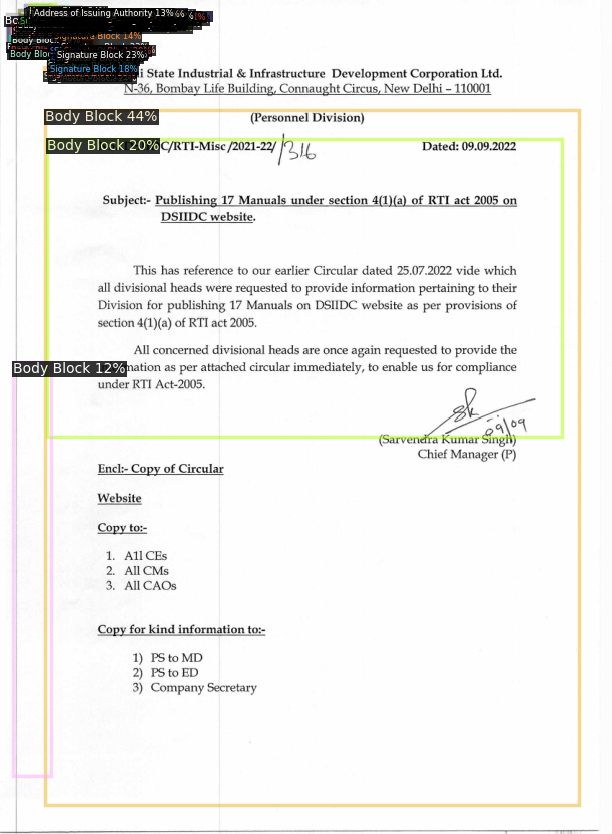

In [ ]:
# Perform inference
im = cv2.imread("/content/drive/MyDrive/tactful/SplitCircularsv2/first_page/2226_09092022circular-17manualsrti_fp.png")
outputs = predictor(im)

# Get the bounding boxes, labels, and scores
instances = outputs["instances"]
pred_boxes = instances.pred_boxes.tensor.tolist()
pred_classes = instances.pred_classes.tolist()
scores = instances.scores.tolist()

MAPPING = {'0': 'Date Block', '1': 'Logos', '2': 'Subject Block', '3': 'Body Block', '4': 'Circular ID', '5': 'Table', '6': 'Stamps/Seals', '7': 'Handwritten Text', '8': 'Copy-Forwarded To Block', '9': 'Address of Issuing Authority', '10': 'Signature', '11': 'Reference Block', '12': 'Signature Block', '13': 'Header Block', '14': 'Addressed To Block'}

# Print the predictions
for i in range(len(pred_boxes)):
    print(f"Bounding box: {pred_boxes[i]}, Label: {MAPPING[str(pred_classes[i])]}, Score: {scores[i]}")

# Visualize the predictions
v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]))
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
cv2_imshow(out.get_image()[:, :, ::-1])


In [ ]:
!python /content/drive/MyDrive/tactful/trust/Tactful/infer.py -i '/content/drive/MyDrive/tactful/docvqa/val/123_64_Mahatma_Gandhi_Series_fp.png'

Traceback (most recent call last):
  File "/content/drive/MyDrive/tactful/trust/Tactful/infer.py", line 41, in <module>
    main(arg)
  File "/content/drive/MyDrive/tactful/trust/Tactful/infer.py", line 10, in main
    predictor=create_model(cfg,'test')
  File "/content/drive/MyDrive/tactful/trust/Tactful/src/helper.py", line 41, in create_model
    tester = DefaultPredictor(cfg)
  File "/usr/local/lib/python3.10/dist-packages/detectron2/engine/defaults.py", line 288, in __init__
    checkpointer.load(cfg.MODEL.WEIGHTS)
  File "/usr/local/lib/python3.10/dist-packages/detectron2/checkpoint/detection_checkpoint.py", line 62, in load
    ret = super().load(path, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/fvcore/common/checkpoint.py", line 153, in load
    assert os.path.isfile(path), "Checkpoint {} not found!".format(path)
AssertionError: Checkpoint model_result/sanskrit_com1/initial_training/model_final.pth not found!


# rough


In [15]:
import cv2
from google.colab.patches import cv2_imshow
import os

In [21]:
import json

# Open the JSON file
with open('/content/drive/MyDrive/tactful/docvqa/docvqa_lake_coco.json', 'r') as f:
    data = json.load(f)

# Now 'data' contains the data from the JSON file
print(data['images'])


[{'height': 842, 'width': 596, 'id': 1, 'file_name': '1255_circular%20%2810%29_fp.png'}, {'height': 792, 'width': 610, 'id': 2, 'file_name': '1273_6100406_om_fp.png'}, {'height': 3495, 'width': 2551, 'id': 3, 'file_name': '1291_1_834_1_ViewFilesDTC.aspx_fp.png'}, {'height': 842, 'width': 596, 'id': 4, 'file_name': '1376_RA%20Bill_fp.png'}, {'height': 842, 'width': 596, 'id': 5, 'file_name': '1487_splofficer_2_2022_07_25_13_13_34_fp.png'}, {'height': 842, 'width': 596, 'id': 6, 'file_name': '1647_RGO_Stakeholders_Comments_Letter_fp.png'}, {'height': 843, 'width': 596, 'id': 7, 'file_name': '1697_Circular_No.65-new_fp.png'}, {'height': 842, 'width': 596, 'id': 8, 'file_name': '1983_promotion-of-sports_fp.png'}, {'height': 842, 'width': 596, 'id': 9, 'file_name': '2220_UnescoPrizeDEPD_fp.png'}, {'height': 842, 'width': 596, 'id': 10, 'file_name': '2493_DDG_VC_dt_28062023_fp.png'}, {'height': 1008, 'width': 612, 'id': 11, 'file_name': '256_509ccb24daea1nclpextension2_0_fp.png'}, {'height':

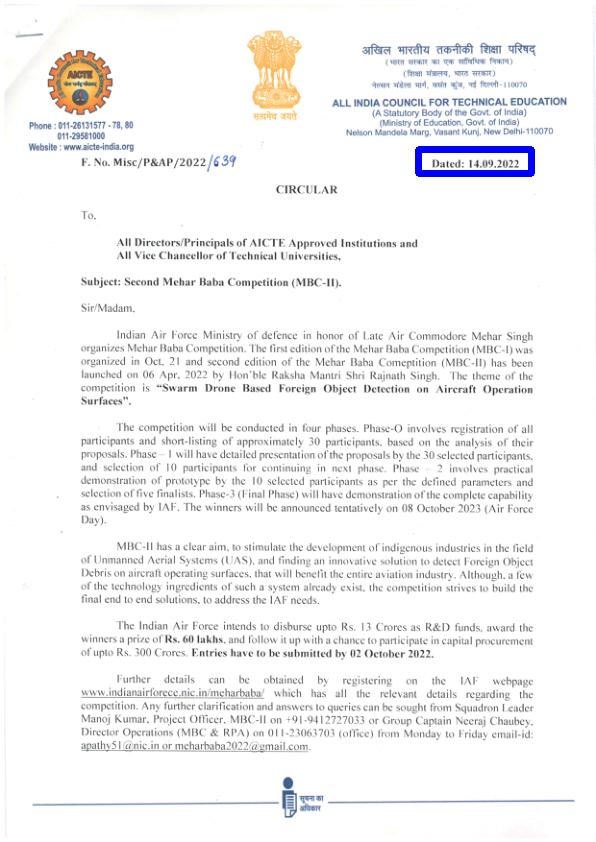

In [22]:
img=cv2.imread(os.path.join('/content/drive/MyDrive/tactful/SplitCircularsv2/first_page','1255_circular%20%2810%29_fp.png'))
# anot=data[0]['annotations']
# width=0
# # [418.0, 149.0, 113.0, 24.0]
# for annotation in anot:
#         if annotation['type']=='rectanglelabels':
#             if width==0:
#                 width=annotation['original_width']
#                 height=annotation['original_height']
#                 print('>>>',[width,height])
#             x,y,w,h=annotation['value']['x'],annotation['value']['y'],annotation['value']['width'],annotation['value']['height']
#             label=annotation['value']['rectanglelabels'][0]
#             if label in ['Adressed To','Circular Reference','Reference Id']:
#                 continue
#             # labels.add(label)
#             print([label,[x,y,w,h]])
#             # cv2.rectangle(img, (int(x/100*width),int(y/100*height)), (int((x+w)/100*width),int((y+h)/100*height)), (255,0,0), 5)
cv2.rectangle(img, (int(418.0), int(149.0)), (418+113,149+24), (255,0,0), 5)
cv2_imshow(img)

In [9]:
%cd /content/

/content


In [23]:
!python /content/drive/MyDrive/tactful/Tactful/infer.py -i /content/drive/MyDrive/tactful/SplitCircularsv2/first_page/1255_circular%20%2810%29_fp.png -c /content/drive/MyDrive/tactful/faster_rcnn_pub_config.yml -m /content/drive/MyDrive/tactful/faster_rcnn/com/initial_training/model_final.pth

Skip loading parameter 'roi_heads.box_predictor.cls_score.weight' to the model due to incompatible shapes: (16, 1024) in the checkpoint but (7, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.cls_score.bias' to the model due to incompatible shapes: (16,) in the checkpoint but (7,) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.weight' to the model due to incompatible shapes: (60, 1024) in the checkpoint but (24, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.bias' to the model due to incompatible shapes: (60,) in the checkpoint but (24,) in the model! You might want to double check if this is expected.
Some model parameters or buffers are not found in the checkpoint:
roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, we